# 빅데이터 분석 프로젝트: (주)맑은물정수기
- (주)맑은물정수기: 정수기 제조/렌탈 기업
- 가전 렌탈 시장 성장에도 불구, 당사의 매출액과 시장점유율 급감
- 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt


# K-modes
import kmodes

# 나무
from sklearn.tree import export_graphviz
import graphviz

# 데이터 분할
from sklearn.model_selection import train_test_split

# 예측 모형: Logistic regression
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import GradientBoostingClassifier as GBC

from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# https://pypi.org/project/kmodes/
from kmodes.kmodes import KModes

%matplotlib inline
matplotlib.rc('font', family = 'NanumBarunGothic')

path = '/home/pirl/BDAI-정덕성/Group/data/'
list_files = ['user.csv', 'address.csv', 'contract.csv']

In [2]:
df_user = pd.read_csv(path + list_files[0], engine='python', encoding = 'euc-kr')
df_addr = pd.read_csv(path + list_files[1], engine='python', encoding = 'euc-kr')
df_cont = pd.read_csv(path + list_files[2], engine='python', encoding = 'euc-kr')

In [3]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
contractID     49983 non-null object
gift           49997 non-null float64
Termination    49997 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [4]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
seq             49668 non-null float64
customerID      49768 non-null float64
gender          49997 non-null object
customerType    49759 non-null object
age             49997 non-null object
marital         49997 non-null object
contractID      49983 non-null object
residence       49997 non-null object
channel         49997 non-null object
credit          49997 non-null object
payment         49485 non-null object
paymentCO       49997 non-null object
quantity        49997 non-null float64
maxDay          49997 non-null float64
overDue         49997 non-null float64
dtypes: float64(5), object(10)
memory usage: 5.7+ MB


In [5]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
seq             49668 non-null float64
customerID      49768 non-null float64
gender          49997 non-null object
customerType    49759 non-null object
age             49997 non-null object
marital         49997 non-null object
contractID      49983 non-null object
residence       49997 non-null object
channel         49997 non-null object
credit          49997 non-null object
payment         49485 non-null object
paymentCO       49997 non-null object
quantity        49997 non-null float64
maxDay          49997 non-null float64
overDue         49997 non-null float64
dtypes: float64(5), object(10)
memory usage: 5.7+ MB


In [6]:
df_user['gender'].unique()

array(['FEMALE', 'MALE', 'UNKOWN', nan], dtype=object)

In [7]:
len(df_user[df_user['gender']=='UNKOWN'])

27

In [8]:
df_user['marital'].unique()

array(['SINGLE', 'MARRIED', nan], dtype=object)

In [9]:
df_user[df_user['gender'].isnull()]

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue
12483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_cont['gift'].unique()

array([ 1.,  0., nan])

In [11]:
df_user['payment'].unique()

array(['CARD', 'CMS', nan], dtype=object)

In [12]:
df_user['paymentCO'].unique()

array(['현대카드', '국민은행', '기업은행', '국민카드', '외환카드', '새마을금고', '삼성카드', 'SC제일은행',
       '우리은행', '롯데카드', '우체국', nan], dtype=object)

In [13]:
df_user[df_user['payment'].isnull()]

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue
129,130.0,905600.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-33819,APART,하이마트,MIDDLE,NaN,롯데카드,57.9,0.0,0.0
361,362.0,950063.0,MALE,BUSINESS,50대,SINGLE,MMQ-66462,HOUSE,이마트,HIGH,NaN,국민은행,283.3,6.0,0.0
423,424.0,891194.0,FEMALE,PERSONAL,40대,MARRIED,MMQ-56814,ETC.,인터넷,HIGH,NaN,국민은행,94.9,6.0,0.0
503,504.0,801043.0,FEMALE,PERSONAL,50대,MARRIED,EMQ-72373,HOUSE,홈쇼핑/방송,HIGH,NaN,외환카드,58.2,5.0,0.0
591,592.0,700160.0,FEMALE,PERSONAL,50대,MARRIED,EMQ-54204,HOUSE,서비스 방문,HIGH,NaN,외환카드,77.8,6.0,0.0
605,606.0,942452.0,MALE,PERSONAL,50대,MARRIED,HIQ-76874,APART,홈플러스,MIDDLE,NaN,기업은행,44.9,4.0,0.0
847,848.0,660445.0,MALE,PERSONAL,40대,MARRIED,EIQ-57516,HOUSE,렌탈재계약,MIDDLE,NaN,국민은행,71.1,3.0,0.0
944,945.0,847313.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-44626,OFFICETEL,렌탈재계약,MIDDLE,NaN,삼성카드,43.7,6.0,0.0
958,959.0,859204.0,FEMALE,BUSINESS,40대,MARRIED,MIQ-78056,APART,홈쇼핑/방송,HIGH,NaN,우리은행,256.3,4.0,0.0
1480,1481.0,850550.0,FEMALE,BUSINESS,60대 이상,MARRIED,MIQ-43603,APART,인터넷,MIDDLE,NaN,기업은행,514.3,4.0,0.0


In [14]:
df_user[df_user['paymentCO']=='우체국']

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue
36,37.0,722745.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-61903,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,우체국,74.3,2.0,0.0
49,50.0,771632.0,MALE,PERSONAL,40대,MARRIED,EIQ-75842,HOUSE,홈쇼핑/인터넷,MIDDLE,CMS,우체국,51.8,5.0,0.0
54,55.0,792877.0,MALE,PERSONAL,20대,SINGLE,MIQ-71035,HOUSE,하이마트,MIDDLE,CMS,우체국,54.1,3.0,0.0
69,70.0,664527.0,FEMALE,NaN,30대,SINGLE,MMQ-74814,APART,서비스 방문,MIDDLE,CMS,우체국,89.9,5.0,0.0
94,95.0,771158.0,MALE,PERSONAL,20대,MARRIED,MIQ-78138,HOUSE,서비스 방문,HIGH,CMS,우체국,86.3,5.0,0.0
106,107.0,666247.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-33814,OFFICETEL,서비스 방문,MIDDLE,CMS,우체국,43.1,6.0,0.0
147,148.0,748215.0,FEMALE,PERSONAL,30대,MARRIED,HMQ-40490,HOUSE,홈쇼핑/방송,MIDDLE,CMS,우체국,88.2,1.0,0.0
154,155.0,974319.0,MALE,PERSONAL,20대,MARRIED,MMQ-71805,APART,서비스 방문,MIDDLE,CMS,우체국,92.5,4.0,0.0
184,185.0,732596.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-39914,APART,홈쇼핑/방송,MIDDLE,CMS,우체국,94.5,4.0,0.0
197,198.0,767207.0,FEMALE,BUSINESS,30대,SINGLE,MMQ-37960,APART,하하영업방판,HIGH,CMS,우체국,251.8,4.0,0.0


In [15]:
df_user[df_user['paymentCO']=='우체국']['payment'].unique()

array(['CMS', nan], dtype=object)

In [16]:
df_user['credit'].unique()

array(['MIDDLE', 'HIGH', 'LOW', 'UNKOWN', nan], dtype=object)

In [17]:
len(df_user[df_user['credit']=='UNKOWN'])

25

In [18]:
df_user['channel'].unique()

array(['서비스 방문', '렌탈재계약', '렌탈총판', '하이마트', '홈쇼핑/방송', '홈쇼핑/인터넷', '이마트',
       '인터넷', '하하영업방판', '전자랜드', '홈플러스', '호호영업방판', nan], dtype=object)

In [19]:
df_user['residence'].unique()

array(['OFFICETEL', 'ETC.', 'APART', 'HOUSE', nan], dtype=object)

In [20]:
len(df_user[df_user['residence']=='ETC.'])

2520

In [21]:
df_user['customerType'].unique()

array(['PERSONAL', 'BUSINESS', nan], dtype=object)

In [22]:
df_user['age'].unique()

array(['50대', '20대', '30대', '40대', '60대 이상', '미상', nan], dtype=object)

In [23]:
len(df_user[df_user['age']=='미상'])

18

In [24]:
df_addr['province'].unique()

array(['경기도', '서울시', '충청도', '부산시', '경상도', '전라도', nan], dtype=object)

In [25]:
len(df_addr[df_addr['province'].isnull()])

539

In [26]:
df_addr['city'].unique()

array(['화성시', '강남구', '청주시', '강동구', '해운대구', '거제시', '연제구', '해남군', '홍성군',
       '함안군', '포항시 북구', '가평군', '양천구', '충주시', '광양시', '포천시', '기장군', '익산시',
       '안양시', '강북구', '평택시', '마포구', '하동군', '사하구', '포항시 남구', '진구', '곡성군',
       '천안시', '진천군', '구례군', nan], dtype=object)

In [27]:
df_addr['provinceIS'].unique()

array(['경상도', '충청도', '서울시', '부산시', '전라도', '경기도', nan], dtype=object)

In [28]:
df_addr['cityIS'].unique()

array(['포항시 남구', '청주시', '양천구', '강남구', '강동구', '진구', '광양시', '해남군', '홍성군',
       '안양시', '함안군', '가평군', '기장군', '익산시', '사하구', '평택시', '포천시', '충주시',
       '강북구', '해운대구', '하동군', '연제구', '천안시', '거제시', '포항시 북구', '진천군', '마포구',
       '화성시', '구례군', '곡성군', nan], dtype=object)

In [29]:
df_user.describe()

,seq,customerID,quantity,maxDay,overDue
count,49668.000000,49768.000000,49997.000000,49997.000000,49997.000000
mean,25006.428566,828627.069744,107.821067,3.489509,0.065544
std,14437.063974,99354.722888,100.092201,2.051324,0.482310
min,1.000000,656376.000000,10.900000,0.000000,0.000000
25%,12502.750000,742631.500000,59.300000,2.000000,0.000000
50%,25013.500000,828788.500000,74.200000,4.000000,0.000000
75%,37518.250000,915211.250000,91.200000,5.000000,0.000000
max,50000.000000,999998.000000,585.900000,9.000000,12.000000


In [30]:
df_user['quantity'].describe()

count    49997.000000
mean       107.821067
std        100.092201
min         10.900000
25%         59.300000
50%         74.200000
75%         91.200000
max        585.900000
Name: quantity, dtype: float64

In [31]:
df_user['quantity'].describe()

count    49997.000000
mean       107.821067
std        100.092201
min         10.900000
25%         59.300000
50%         74.200000
75%         91.200000
max        585.900000
Name: quantity, dtype: float64

In [32]:
Q1 = df_user['quantity'].quantile(0.25)
Q3 = df_user['quantity'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
filtered = df_user.query('(@Q1 - 1.5 * @IQR) <= quantity <= (@Q3 + 1.5 * @IQR)')

In [33]:
df_filtered = df_user[(df_user['quantity'] > Q3+1.5*IQR) | (df_user['quantity'] < Q1-1.5*IQR) ]

In [34]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7341 entries, 8 to 49990
Data columns (total 15 columns):
seq             7298 non-null float64
customerID      7304 non-null float64
gender          7341 non-null object
customerType    7310 non-null object
age             7341 non-null object
marital         7341 non-null object
contractID      7341 non-null object
residence       7341 non-null object
channel         7341 non-null object
credit          7341 non-null object
payment         7265 non-null object
paymentCO       7341 non-null object
quantity        7341 non-null float64
maxDay          7341 non-null float64
overDue         7341 non-null float64
dtypes: float64(5), object(10)
memory usage: 917.6+ KB


In [35]:
IQR

31.900000000000006

In [36]:
intv_IQR = [Q1-1.5*IQR, Q3+1.5*IQR]
intv_IQR

[11.449999999999989, 139.05]

In [37]:
sigma3 = df_user['quantity'].std()
upper_sigma = df_user['quantity'].mean() + sigma3 * 3

In [38]:
upper_sigma

408.0976699833028

In [39]:
df_filtered = df_user[(df_user['quantity'] > upper_sigma)]

In [40]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 8 to 49975
Data columns (total 15 columns):
seq             1741 non-null float64
customerID      1739 non-null float64
gender          1747 non-null object
customerType    1742 non-null object
age             1747 non-null object
marital         1747 non-null object
contractID      1747 non-null object
residence       1747 non-null object
channel         1747 non-null object
credit          1747 non-null object
payment         1722 non-null object
paymentCO       1747 non-null object
quantity        1747 non-null float64
maxDay          1747 non-null float64
overDue         1747 non-null float64
dtypes: float64(5), object(10)
memory usage: 218.4+ KB


In [41]:
df_user.isna().sum()

seq             332
customerID      232
gender            3
customerType    241
age               3
marital           3
contractID       17
residence         3
channel           3
credit            3
payment         515
paymentCO         3
quantity          3
maxDay            3
overDue           3
dtype: int64

In [42]:
# df_user_short = df_user[df_user['customerID'].isna()==False]
# df_user_short.isna().sum()

In [43]:
df_cont_short = df_cont[df_cont['contractID'].isna()==False]
df_cont_short.isna().sum()

contractID     0
gift           0
Termination    0
dtype: int64

In [44]:
df_addr_short = df_addr[df_addr['customerID'].isna()==False]
df_addr_short.isna().sum()

customerID      0
province      536
city            0
provinceIS      0
cityIS          0
dtype: int64

In [45]:
df_merged = df_user.merge(df_cont_short, left_on='contractID', right_on='contractID')
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49983 entries, 0 to 49982
Data columns (total 17 columns):
seq             49654 non-null float64
customerID      49754 non-null float64
gender          49983 non-null object
customerType    49745 non-null object
age             49983 non-null object
marital         49983 non-null object
contractID      49983 non-null object
residence       49983 non-null object
channel         49983 non-null object
credit          49983 non-null object
payment         49471 non-null object
paymentCO       49983 non-null object
quantity        49983 non-null float64
maxDay          49983 non-null float64
overDue         49983 non-null float64
gift            49983 non-null float64
Termination     49983 non-null float64
dtypes: float64(7), object(10)
memory usage: 6.9+ MB


In [46]:
df_merged_all = df_merged.merge(df_addr_short, left_on='customerID', right_on='customerID')
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 21 columns):
seq             49426 non-null float64
customerID      49754 non-null float64
gender          49754 non-null object
customerType    49516 non-null object
age             49754 non-null object
marital         49754 non-null object
contractID      49754 non-null object
residence       49754 non-null object
channel         49754 non-null object
credit          49754 non-null object
payment         49243 non-null object
paymentCO       49754 non-null object
quantity        49754 non-null float64
maxDay          49754 non-null float64
overDue         49754 non-null float64
gift            49754 non-null float64
Termination     49754 non-null float64
province        49218 non-null object
city            49754 non-null object
provinceIS      49754 non-null object
cityIS          49754 non-null object
dtypes: float64(7), object(14)
memory usage: 8.4+ MB


In [47]:
df_merged_all.isna().sum()

seq             328
customerID        0
gender            0
customerType    238
age               0
marital           0
contractID        0
residence         0
channel           0
credit            0
payment         511
paymentCO         0
quantity          0
maxDay            0
overDue           0
gift              0
Termination       0
province        536
city              0
provinceIS        0
cityIS            0
dtype: int64

In [48]:
df_byid = df_merged_all[['customerID', 'contractID']].groupby(['customerID']).count()

In [49]:
df_byid.head()

,contractID
customerID,
656376.0,1
656387.0,1
656389.0,1
656395.0,1
656421.0,1


In [50]:
df_byid.describe()

,contractID
count,49754.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [51]:
df_bycont = df_merged_all[['customerID', 'contractID']].groupby(['contractID']).count()

In [52]:
df_bycont.head()

,customerID
contractID,
EIQ-32464,1
EIQ-32476,1
EIQ-32482,1
EIQ-32508,1
EIQ-32513,1


In [53]:
df_bycont.describe()

,customerID
count,49754.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [54]:
len(df_merged_all['contractID'].unique())

49754

In [55]:
len(df_merged_all['customerID'].unique())

49754

In [56]:
df_merged_all.isna().sum()

seq             328
customerID        0
gender            0
customerType    238
age               0
marital           0
contractID        0
residence         0
channel           0
credit            0
payment         511
paymentCO         0
quantity          0
maxDay            0
overDue           0
gift              0
Termination       0
province        536
city              0
provinceIS        0
cityIS            0
dtype: int64

In [57]:
df_temp = df_cont_short.merge(df_user, left_on='contractID', right_on='contractID')

In [58]:
df_temp.isna().sum()

contractID        0
gift              0
Termination       0
seq             329
customerID      229
gender            0
customerType    238
age               0
marital           0
residence         0
channel           0
credit            0
payment         512
paymentCO         0
quantity          0
maxDay            0
overDue           0
dtype: int64

In [59]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49983 entries, 0 to 49982
Data columns (total 17 columns):
contractID      49983 non-null object
gift            49983 non-null float64
Termination     49983 non-null float64
seq             49654 non-null float64
customerID      49754 non-null float64
gender          49983 non-null object
customerType    49745 non-null object
age             49983 non-null object
marital         49983 non-null object
residence       49983 non-null object
channel         49983 non-null object
credit          49983 non-null object
payment         49471 non-null object
paymentCO       49983 non-null object
quantity        49983 non-null float64
maxDay          49983 non-null float64
overDue         49983 non-null float64
dtypes: float64(7), object(10)
memory usage: 6.9+ MB


In [60]:
df_temp_all = df_addr_short.merge(df_temp, left_on='customerID', right_on='customerID')

In [61]:
df_temp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 21 columns):
customerID      49754 non-null float64
province        49218 non-null object
city            49754 non-null object
provinceIS      49754 non-null object
cityIS          49754 non-null object
contractID      49754 non-null object
gift            49754 non-null float64
Termination     49754 non-null float64
seq             49426 non-null float64
gender          49754 non-null object
customerType    49516 non-null object
age             49754 non-null object
marital         49754 non-null object
residence       49754 non-null object
channel         49754 non-null object
credit          49754 non-null object
payment         49243 non-null object
paymentCO       49754 non-null object
quantity        49754 non-null float64
maxDay          49754 non-null float64
overDue         49754 non-null float64
dtypes: float64(7), object(14)
memory usage: 8.4+ MB


In [62]:
df_temp_all.isna().sum()

customerID        0
province        536
city              0
provinceIS        0
cityIS            0
contractID        0
gift              0
Termination       0
seq             328
gender            0
customerType    238
age               0
marital           0
residence         0
channel           0
credit            0
payment         511
paymentCO         0
quantity          0
maxDay            0
overDue           0
dtype: int64

In [63]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 21 columns):
seq             49426 non-null float64
customerID      49754 non-null float64
gender          49754 non-null object
customerType    49516 non-null object
age             49754 non-null object
marital         49754 non-null object
contractID      49754 non-null object
residence       49754 non-null object
channel         49754 non-null object
credit          49754 non-null object
payment         49243 non-null object
paymentCO       49754 non-null object
quantity        49754 non-null float64
maxDay          49754 non-null float64
overDue         49754 non-null float64
gift            49754 non-null float64
Termination     49754 non-null float64
province        49218 non-null object
city            49754 non-null object
provinceIS      49754 non-null object
cityIS          49754 non-null object
dtypes: float64(7), object(14)
memory usage: 8.4+ MB


In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [65]:
# paymentCO 에서 뒤에서 두 글자 빼오기 -> paymentCOTail
df_merged_all['paymentCOTail'] = df_merged_all['paymentCO'].str[-2:]
df_merged_all['paymentCOTail']

0        카드
1        은행
2        은행
3        은행
4        은행
5        은행
6        카드
7        은행
8        은행
9        카드
10       카드
11       금고
12       카드
13       은행
14       카드
15       카드
16       카드
17       카드
18       카드
19       카드
20       은행
21       카드
22       은행
23       은행
24       카드
25       카드
26       은행
27       카드
28       은행
29       카드
         ..
49724    은행
49725    은행
49726    카드
49727    은행
49728    카드
49729    은행
49730    은행
49731    카드
49732    카드
49733    금고
49734    은행
49735    금고
49736    은행
49737    카드
49738    카드
49739    카드
49740    카드
49741    카드
49742    은행
49743    카드
49744    은행
49745    금고
49746    체국
49747    은행
49748    은행
49749    카드
49750    카드
49751    은행
49752    카드
49753    은행
Name: paymentCOTail, Length: 49754, dtype: object

In [66]:
df_merged_all.head()

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행


In [67]:
df_merged_all.tail()

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
49749,49996.0,696477.0,FEMALE,PERSONAL,40대,SINGLE,EMQ-42747,APART,전자랜드,MIDDLE,CARD,삼성카드,48.5,6.0,0.0,0.0,0.0,전라도,해남군,부산시,연제구,카드
49750,49997.0,722325.0,FEMALE,PERSONAL,40대,MARRIED,MMQ-47631,APART,홈쇼핑/방송,MIDDLE,CARD,외환카드,76.5,1.0,0.0,0.0,0.0,충청도,청주시,서울시,강남구,카드
49751,49998.0,858097.0,FEMALE,PERSONAL,50대,SINGLE,HMQ-48815,APART,홈쇼핑/인터넷,MIDDLE,CMS,국민은행,40.0,6.0,0.0,0.0,0.0,서울시,강북구,경기도,가평군,은행
49752,49999.0,819716.0,MALE,PERSONAL,50대,MARRIED,MMQ-56076,APART,홈쇼핑/방송,HIGH,CARD,국민카드,87.9,6.0,0.0,0.0,0.0,경기도,평택시,경기도,안양시,카드
49753,50000.0,983370.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-68660,OFFICETEL,전자랜드,MIDDLE,NaN,우리은행,75.0,5.0,0.0,1.0,0.0,경기도,화성시,부산시,사하구,은행


In [68]:
# payment 결측치에 '카드'로 끝나는 관측치에 'CARD' 부여
df_merged_all.loc[(df_merged_all.paymentCOTail =='카드') \
                  & df_merged_all.payment.isna(), 'payment'] = 'CARD'
df_merged_all.isna().sum()

seq              328
customerID       0  
gender           0  
customerType     238
age              0  
marital          0  
contractID       0  
residence        0  
channel          0  
credit           0  
payment          307
paymentCO        0  
quantity         0  
maxDay           0  
overDue          0  
gift             0  
Termination      0  
province         536
city             0  
provinceIS       0  
cityIS           0  
paymentCOTail    0  
dtype: int64

In [69]:
# payment 결측치에 '카드'로 끝나지 않는(우체국, 새마을금고 때문) 관측치에 'CMS' 부여
df_merged_all.loc[(df_merged_all.paymentCOTail != '카드') \
                  & df_merged_all.payment.isna(), 'payment'] = 'CMS'

In [70]:
df_merged_all.isna().sum()

seq              328
customerID       0  
gender           0  
customerType     238
age              0  
marital          0  
contractID       0  
residence        0  
channel          0  
credit           0  
payment          0  
paymentCO        0  
quantity         0  
maxDay           0  
overDue          0  
gift             0  
Termination      0  
province         536
city             0  
provinceIS       0  
cityIS           0  
paymentCOTail    0  
dtype: int64

In [71]:
# 변수 확인
df_merged_all[['payment', 'paymentCO']]

,payment,paymentCO
0,CARD,현대카드
1,CMS,국민은행
2,CMS,기업은행
3,CMS,국민은행
4,CMS,기업은행
5,CMS,국민은행
6,CARD,국민카드
7,CMS,기업은행
8,CMS,기업은행
9,CARD,현대카드


In [72]:
# CMS 중 paymentCO 고유값 확인: 현대카드 색출
df_merged_all.query('payment == "CMS" ')['paymentCO'].unique()

array(['국민은행', '기업은행', '새마을금고', 'SC제일은행', '우리은행', '우체국', '현대카드'],
      dtype=object)

In [73]:
# CMS & 현대카드
df_merged_all.query('payment == "CMS" & paymentCO == "현대카드"')

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
9489,9539.0,972121.0,MALE,PERSONAL,40대,MARRIED,MIQ-56641,APART,전자랜드,MIDDLE,CMS,현대카드,61.1,1.0,0.0,1.0,0.0,경상도,포항시 북구,경상도,포항시 북구,카드
11238,11292.0,712629.0,FEMALE,PERSONAL,40대,SINGLE,EMQ-65948,APART,전자랜드,LOW,CMS,현대카드,82.0,3.0,0.0,1.0,0.0,경기도,가평군,경기도,평택시,카드
12552,12615.0,759461.0,FEMALE,BUSINESS,50대,MARRIED,MIQ-77801,APART,서비스 방문,MIDDLE,CMS,현대카드,530.9,0.0,0.0,0.0,0.0,경상도,포항시 북구,경기도,평택시,카드
15921,15997.0,977981.0,MALE,PERSONAL,50대,MARRIED,EIQ-55695,OFFICETEL,이마트,HIGH,CMS,현대카드,40.4,2.0,0.0,0.0,0.0,서울시,강남구,부산시,해운대구,카드
20710,20814.0,940726.0,FEMALE,PERSONAL,30대,MARRIED,EMQ-40894,HOUSE,렌탈재계약,MIDDLE,CMS,현대카드,77.4,1.0,0.0,0.0,0.0,충청도,천안시,부산시,연제구,카드
33129,33294.0,928315.0,FEMALE,PERSONAL,50대,SINGLE,MIQ-70877,APART,홈플러스,LOW,CMS,현대카드,97.7,5.0,0.0,0.0,0.0,부산시,해운대구,부산시,해운대구,카드
34227,34400.0,997690.0,FEMALE,BUSINESS,30대,MARRIED,MIQ-52989,APART,홈쇼핑/인터넷,LOW,CMS,현대카드,345.6,2.0,0.0,0.0,0.0,서울시,강남구,부산시,기장군,카드
37923,38114.0,687796.0,MALE,PERSONAL,20대,SINGLE,MIQ-74720,APART,서비스 방문,MIDDLE,CMS,현대카드,64.9,6.0,0.0,0.0,0.0,부산시,기장군,서울시,강남구,카드
43667,43887.0,701994.0,FEMALE,PERSONAL,60대 이상,MARRIED,MMQ-72105,APART,서비스 방문,MIDDLE,CMS,현대카드,44.2,0.0,0.0,0.0,0.0,경기도,안양시,경기도,평택시,카드
44493,44719.0,894738.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-39314,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,현대카드,74.1,5.0,0.0,0.0,0.0,경상도,포항시 남구,부산시,사하구,카드


In [74]:
# CARD 중 paymentCO 고유값 확인: 새마을금고 색출
df_merged_all.query('payment == "CARD" ')['paymentCO'].unique()

array(['현대카드', '국민카드', '외환카드', '삼성카드', '롯데카드', '새마을금고'], dtype=object)

In [75]:
df_merged_all.query('payment == "CARD" & paymentCO == "새마을금고"')

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
9232,9281.0,858727.0,FEMALE,PERSONAL,30대,MARRIED,MIQ-75351,OFFICETEL,서비스 방문,MIDDLE,CARD,새마을금고,99.4,2.0,0.0,1.0,0.0,경상도,포항시 남구,경기도,포천시,금고
9395,9444.0,821384.0,FEMALE,PERSONAL,30대,MARRIED,HMQ-58799,APART,렌탈재계약,MIDDLE,CARD,새마을금고,103.7,6.0,0.0,0.0,1.0,서울시,강동구,경기도,화성시,금고
12015,12072.0,945749.0,FEMALE,PERSONAL,30대,SINGLE,EMQ-71064,APART,홈쇼핑/방송,MIDDLE,CARD,새마을금고,87.0,1.0,0.0,0.0,0.0,서울시,강동구,경기도,포천시,금고
15847,15923.0,857795.0,FEMALE,PERSONAL,20대,SINGLE,EIQ-59466,OFFICETEL,렌탈재계약,MIDDLE,CARD,새마을금고,33.2,3.0,0.0,0.0,0.0,부산시,기장군,서울시,강남구,금고
18187,18275.0,669369.0,FEMALE,PERSONAL,20대,SINGLE,MIQ-33545,OFFICETEL,전자랜드,MIDDLE,CARD,새마을금고,67.1,5.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,금고
24053,24174.0,898561.0,MALE,PERSONAL,40대,MARRIED,MIQ-72045,APART,서비스 방문,MIDDLE,CARD,새마을금고,88.0,4.0,4.0,0.0,0.0,경상도,포항시 남구,서울시,강동구,금고
24663,24790.0,836345.0,FEMALE,PERSONAL,50대,SINGLE,MIQ-63317,OFFICETEL,전자랜드,MIDDLE,CARD,새마을금고,78.3,1.0,0.0,0.0,0.0,전라도,광양시,전라도,해남군,금고
24897,25024.0,944422.0,FEMALE,PERSONAL,40대,MARRIED,HMQ-74450,OFFICETEL,하하영업방판,MIDDLE,CARD,새마을금고,86.6,6.0,0.0,1.0,0.0,경상도,포항시 남구,경기도,포천시,금고
26584,26719.0,844814.0,FEMALE,PERSONAL,40대,MARRIED,MIQ-57280,APART,홈쇼핑/방송,MIDDLE,CARD,새마을금고,78.5,6.0,0.0,0.0,0.0,전라도,해남군,전라도,해남군,금고
28466,28610.0,957350.0,MALE,BUSINESS,50대,MARRIED,MMQ-71328,APART,렌탈총판,HIGH,CARD,새마을금고,172.4,6.0,0.0,0.0,1.0,충청도,청주시,충청도,청주시,금고


In [76]:
df_user.query('payment == "CARD" & paymentCO == "새마을금고"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 9280 to 48679
Data columns (total 15 columns):
seq             16 non-null float64
customerID      16 non-null float64
gender          16 non-null object
customerType    16 non-null object
age             16 non-null object
marital         16 non-null object
contractID      16 non-null object
residence       16 non-null object
channel         16 non-null object
credit          16 non-null object
payment         16 non-null object
paymentCO       16 non-null object
quantity        16 non-null float64
maxDay          16 non-null float64
overDue         16 non-null float64
dtypes: float64(5), object(10)
memory usage: 2.0+ KB


In [77]:
df_user.query('payment == "CMS" & paymentCO == "현대카드"').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 9538 to 48057
Data columns (total 15 columns):
seq             11 non-null float64
customerID      11 non-null float64
gender          11 non-null object
customerType    11 non-null object
age             11 non-null object
marital         11 non-null object
contractID      11 non-null object
residence       11 non-null object
channel         11 non-null object
credit          11 non-null object
payment         11 non-null object
paymentCO       11 non-null object
quantity        11 non-null float64
maxDay          11 non-null float64
overDue         11 non-null float64
dtypes: float64(5), object(10)
memory usage: 1.4+ KB


In [78]:
df_merged_all.isna().sum()

seq              328
customerID       0  
gender           0  
customerType     238
age              0  
marital          0  
contractID       0  
residence        0  
channel          0  
credit           0  
payment          0  
paymentCO        0  
quantity         0  
maxDay           0  
overDue          0  
gift             0  
Termination      0  
province         536
city             0  
provinceIS       0  
cityIS           0  
paymentCOTail    0  
dtype: int64

In [79]:
df_merged_all['customerType'].unique()

array(['PERSONAL', 'BUSINESS', nan], dtype=object)

# Province 결측처리

In [80]:
df_merged_all['province'].unique()

array(['경기도', '서울시', '충청도', '부산시', '경상도', '전라도', nan], dtype=object)

In [81]:
df_merged_all[df_merged_all['province'].isna()]

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
44,45.0,969006.0,MALE,PERSONAL,40대,MARRIED,MMQ-33442,OFFICETEL,하이마트,MIDDLE,CMS,우리은행,85.8,5.0,0.0,0.0,0.0,NaN,함안군,충청도,홍성군,은행
94,95.0,771158.0,MALE,PERSONAL,20대,MARRIED,MIQ-78138,HOUSE,서비스 방문,HIGH,CMS,우체국,86.3,5.0,0.0,0.0,0.0,NaN,포항시 남구,부산시,사하구,체국
127,128.0,897885.0,FEMALE,PERSONAL,60대 이상,SINGLE,MIQ-52162,OFFICETEL,렌탈재계약,HIGH,CMS,기업은행,87.6,5.0,0.0,0.0,0.0,NaN,거제시,부산시,진구,은행
280,281.0,664982.0,FEMALE,PERSONAL,50대,MARRIED,EIQ-53136,HOUSE,서비스 방문,LOW,CARD,외환카드,47.4,2.0,0.0,0.0,0.0,NaN,포천시,경기도,화성시,카드
436,437.0,769451.0,FEMALE,BUSINESS,20대,MARRIED,MIQ-70711,APART,하이마트,LOW,CMS,기업은행,294.4,4.0,0.0,0.0,0.0,NaN,진천군,충청도,진천군,은행
496,498.0,920683.0,FEMALE,PERSONAL,60대 이상,MARRIED,HIQ-65224,HOUSE,서비스 방문,MIDDLE,CMS,기업은행,57.7,5.0,0.0,0.0,0.0,NaN,하동군,경상도,하동군,은행
652,655.0,983233.0,FEMALE,PERSONAL,50대,MARRIED,HMQ-48928,APART,렌탈재계약,HIGH,CMS,국민은행,52.1,6.0,0.0,0.0,0.0,NaN,가평군,경기도,평택시,은행
667,670.0,968519.0,FEMALE,PERSONAL,40대,MARRIED,MMQ-80472,APART,홈쇼핑/인터넷,HIGH,CMS,SC제일은행,77.7,5.0,0.0,1.0,0.0,NaN,청주시,부산시,기장군,은행
706,709.0,879010.0,FEMALE,PERSONAL,30대,SINGLE,EMQ-45920,APART,홈플러스,MIDDLE,CMS,우체국,74.6,0.0,0.0,0.0,0.0,NaN,포항시 남구,경기도,화성시,체국
736,739.0,799012.0,MALE,PERSONAL,50대,SINGLE,MIQ-72135,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,56.8,6.0,0.0,1.0,0.0,NaN,포항시 북구,경기도,가평군,은행


In [82]:
# 광역시도-시군구 자료 불러오기
area_province = pd.read_csv(path + 'area_province.csv', engine = 'python', encoding = 'euc-kr')
area_province

,서울시,부산시,경기도,충청도,경상도,전라도
0,강남구,사하구,포천시,청주시,함안군,광양시
1,양천구,해운대구,화성시,충주시,하동군,해남군
2,마포구,기장군,평택시,천안시,포항시 남구,익산시
3,강북구,연제구,가평군,홍성군,포항시 북구,곡성군
4,강동구,진구,안양시,진천군,거제시,구례군


In [83]:
area_province.columns

Index(['서울시', '부산시', '경기도', '충청도', '경상도', '전라도'], dtype='object')

In [84]:
# an empty dictionary
map_city = {}

# updating province-city pairs
for province in area_province.columns:
    p_name = province
    for city in range(5):
        c_name = area_province[province][city]
        map_city.update({c_name : p_name})       

# 'a'를 'A'로 바꿔줄 dictionary
map_city

{'강남구': '서울시',
 '양천구': '서울시',
 '마포구': '서울시',
 '강북구': '서울시',
 '강동구': '서울시',
 '사하구': '부산시',
 '해운대구': '부산시',
 '기장군': '부산시',
 '연제구': '부산시',
 '진구': '부산시',
 '포천시': '경기도',
 '화성시': '경기도',
 '평택시': '경기도',
 '가평군': '경기도',
 '안양시': '경기도',
 '청주시': '충청도',
 '충주시': '충청도',
 '천안시': '충청도',
 '홍성군': '충청도',
 '진천군': '충청도',
 '함안군': '경상도',
 '하동군': '경상도',
 '포항시 남구': '경상도',
 '포항시 북구': '경상도',
 '거제시': '경상도',
 '광양시': '전라도',
 '해남군': '전라도',
 '익산시': '전라도',
 '곡성군': '전라도',
 '구례군': '전라도'}

## 결측치 처리

In [85]:
# 'province'가 결측된 df_merged_all의 'city' 열을 
# map_city dictionary가 정의한 규칙에 따라 값을 부여한 
# df_prov_filled 생성
df_prov_filled = df_merged_all[df_merged_all['province'].isna()]['city'].map(map_city)


# df_merged_all.province의 결측치를 fillna method로 채우되
# df_prov_filled에 있는 값으로 채워넣고
# inplace = True -> 원래 있던 nan 값을 대체함
df_merged_all.province.fillna(df_prov_filled, inplace = True)

df_merged_all.isna().sum()

seq              328
customerID       0  
gender           0  
customerType     238
age              0  
marital          0  
contractID       0  
residence        0  
channel          0  
credit           0  
payment          0  
paymentCO        0  
quantity         0  
maxDay           0  
overDue          0  
gift             0  
Termination      0  
province         0  
city             0  
provinceIS       0  
cityIS           0  
paymentCOTail    0  
dtype: int64

In [86]:
df_merged_all

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행
5,6.0,952126.0,FEMALE,PERSONAL,40대,MARRIED,HMQ-39892,APART,서비스 방문,LOW,CMS,국민은행,79.7,6.0,0.0,1.0,0.0,서울시,강동구,경상도,포항시 남구,은행
6,7.0,791262.0,MALE,PERSONAL,20대,MARRIED,MIQ-54943,OFFICETEL,홈쇼핑/방송,HIGH,CARD,국민카드,71.1,3.0,0.0,0.0,0.0,부산시,해운대구,서울시,양천구,카드
7,8.0,703615.0,MALE,PERSONAL,50대,MARRIED,MIQ-73987,OFFICETEL,홈쇼핑/방송,MIDDLE,CMS,기업은행,77.4,6.0,0.0,1.0,0.0,경상도,거제시,부산시,진구,은행
8,9.0,704263.0,MALE,BUSINESS,60대 이상,SINGLE,MIQ-36963,OFFICETEL,홈쇼핑/인터넷,MIDDLE,CMS,기업은행,473.9,1.0,0.0,0.0,0.0,부산시,해운대구,충청도,청주시,은행
9,10.0,784541.0,MALE,PERSONAL,30대,MARRIED,MIQ-42984,APART,이마트,MIDDLE,CARD,현대카드,117.2,0.0,0.0,0.0,0.0,부산시,연제구,전라도,광양시,카드


In [87]:
df_merged_all.query('province=="서울시"')['city'].unique()

array(['강남구', '강동구', '양천구', '강북구', '마포구'], dtype=object)

In [88]:
df_merged_all.query('province=="경기도"')['city'].unique()

array(['화성시', '가평군', '포천시', '안양시', '평택시'], dtype=object)

In [89]:
df_merged_all.query('province=="충청도"')['city'].unique()

array(['청주시', '홍성군', '충주시', '천안시', '진천군'], dtype=object)

In [90]:
df_merged_all.query('province=="경상도"')['city'].unique()

array(['거제시', '함안군', '포항시 북구', '하동군', '포항시 남구'], dtype=object)

In [91]:
df_merged_all.query('province=="전라도"')['city'].unique()

array(['해남군', '광양시', '익산시', '곡성군', '구례군'], dtype=object)

In [92]:
df_merged_all['customerType'].unique()

array(['PERSONAL', 'BUSINESS', nan], dtype=object)

# 급지 정보

In [93]:
# 광역시도-시군구 자료 불러오기
area_grade = pd.read_csv(path + 'area_grade.csv', engine = 'python', encoding = 'euc-kr')
area_grade

,1급지,2급지,3급지,4급지,5급지,6급지
0,강남구,포천시,강북구,광양시,하동군,충주시
1,양천구,화성시,평택시,해남군,함안군,익산시
2,해운대구,포항시 남구,가평군,연제구,거제시,구례군
3,기장군,강동구,안양시,천안시,진구,곡성군
4,청주시,사하구,포항시 북구,마포구,홍성군,진천군


In [94]:
area_grade.columns

Index(['1급지', '2급지', '3급지', '4급지', '5급지', '6급지'], dtype='object')

In [95]:
# an empty dictionary
grademap_city = {}

# updating grade-city pairs
for grade in area_grade.columns:
    g_name = grade
    for city in range(5):
        c_name = area_grade[grade][city]
        grademap_city.update({c_name : g_name})       

# 'a'를 'A'로 바꿔줄 dictionary
grademap_city

{'강남구': '1급지',
 '양천구': '1급지',
 '해운대구': '1급지',
 '기장군': '1급지',
 '청주시': '1급지',
 '포천시': '2급지',
 '화성시': '2급지',
 '포항시 남구': '2급지',
 '강동구': '2급지',
 '사하구': '2급지',
 '강북구': '3급지',
 '평택시': '3급지',
 '가평군': '3급지',
 '안양시': '3급지',
 '포항시 북구': '3급지',
 '광양시': '4급지',
 '해남군': '4급지',
 '연제구': '4급지',
 '천안시': '4급지',
 '마포구': '4급지',
 '하동군': '5급지',
 '함안군': '5급지',
 '거제시': '5급지',
 '진구': '5급지',
 '홍성군': '5급지',
 '충주시': '6급지',
 '익산시': '6급지',
 '구례군': '6급지',
 '곡성군': '6급지',
 '진천군': '6급지'}

In [96]:
# mapping area grades
df_merged_all['cityGrade'] = df_merged_all['city'].map(grademap_city)
df_merged_all.head()

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail,cityGrade
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드,2급지
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행,1급지
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행,1급지
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행,1급지
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행,2급지


## 유통채널 범주

In [97]:
map_channel = {'렌탈총판': '총판','하하영업방판': '총판','호호영업방판': '총판',
              '이마트': '대형마트', '홈플러스': '대형마트',
              '하이마트': '양판점', '전자랜드': '양판점',
              '홈쇼핑/방송': '쇼핑몰', '홈쇼핑/인터넷': '쇼핑몰', '인터넷':'쇼핑몰',
              '렌탈재계약': '연장', '서비스 방문': '연장'}

In [98]:
map_channel

{'렌탈총판': '총판',
 '하하영업방판': '총판',
 '호호영업방판': '총판',
 '이마트': '대형마트',
 '홈플러스': '대형마트',
 '하이마트': '양판점',
 '전자랜드': '양판점',
 '홈쇼핑/방송': '쇼핑몰',
 '홈쇼핑/인터넷': '쇼핑몰',
 '인터넷': '쇼핑몰',
 '렌탈재계약': '연장',
 '서비스 방문': '연장'}

In [99]:
# mapping area grades
df_merged_all['channelType'] = df_merged_all['channel'].map(map_channel)
df_merged_all.head()

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail,cityGrade,channelType
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드,2급지,연장
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행,1급지,연장
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행,1급지,총판
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행,1급지,양판점
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행,2급지,양판점


## 유통채널: 재계약/신규 구분

In [100]:
map_extended = {'연장': '연장',
               '대형마트': '신규', '양판점': '신규', '쇼핑몰': '신규', '총판': '신규'}
map_extended

{'연장': '연장', '대형마트': '신규', '양판점': '신규', '쇼핑몰': '신규', '총판': '신규'}

In [101]:
# mapping area grades
df_merged_all['contractExtended'] = df_merged_all['channelType'].map(map_extended)
df_merged_all.head()

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue,gift,Termination,province,city,provinceIS,cityIS,paymentCOTail,cityGrade,channelType,contractExtended
0,1.0,658673.0,FEMALE,PERSONAL,50대,SINGLE,MMQ-56583,OFFICETEL,서비스 방문,MIDDLE,CARD,현대카드,79.5,3.0,0.0,1.0,0.0,경기도,화성시,경상도,포항시 남구,카드,2급지,연장,연장
1,2.0,729911.0,FEMALE,PERSONAL,20대,MARRIED,EIQ-67155,OFFICETEL,렌탈재계약,MIDDLE,CMS,국민은행,76.5,5.0,0.0,0.0,0.0,서울시,강남구,충청도,청주시,은행,1급지,연장,연장
2,3.0,778222.0,FEMALE,PERSONAL,30대,MARRIED,HIQ-70900,OFFICETEL,렌탈총판,HIGH,CMS,기업은행,55.1,1.0,0.0,0.0,0.0,충청도,청주시,서울시,양천구,은행,1급지,총판,신규
3,4.0,948864.0,MALE,PERSONAL,20대,MARRIED,MIQ-76248,ETC.,하이마트,MIDDLE,CMS,국민은행,50.4,5.0,0.0,0.0,0.0,서울시,강남구,서울시,강남구,은행,1급지,양판점,신규
4,5.0,656563.0,MALE,PERSONAL,30대,SINGLE,MMQ-42016,ETC.,하이마트,MIDDLE,CMS,기업은행,75.3,3.0,0.0,0.0,0.0,서울시,강동구,서울시,강동구,은행,2급지,양판점,신규


## 재계약/신규 X 중도해지

# 계약 유형

In [102]:
df_merged_all['contractType'] = df_merged_all['contractID'].str[:3]
df_merged_all['contractType'].unique()

array(['MMQ', 'EIQ', 'HIQ', 'MIQ', 'HMQ', 'EMQ'], dtype=object)

In [103]:
df_merged_all['contractType_1'] = df_merged_all['contractID'].str[0]
df_merged_all['contractType_2'] = df_merged_all['contractID'].str[1]

In [104]:
df_merged_all[['contractID', 'contractType', 'contractType_1', 'contractType_2']].head()

,contractID,contractType,contractType_1,contractType_2
0,MMQ-56583,MMQ,M,M
1,EIQ-67155,EIQ,E,I
2,HIQ-70900,HIQ,H,I
3,MIQ-76248,MIQ,M,I
4,MMQ-42016,MMQ,M,M


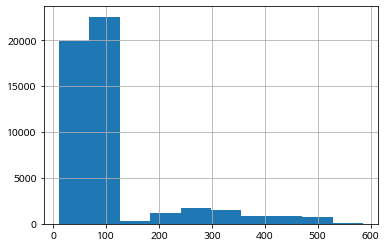

In [105]:
df_merged_all['quantity'].hist()

In [106]:
df_user[df_user['payment'].isna()]

,seq,customerID,gender,customerType,age,marital,contractID,residence,channel,credit,payment,paymentCO,quantity,maxDay,overDue
129,130.0,905600.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-33819,APART,하이마트,MIDDLE,NaN,롯데카드,57.9,0.0,0.0
361,362.0,950063.0,MALE,BUSINESS,50대,SINGLE,MMQ-66462,HOUSE,이마트,HIGH,NaN,국민은행,283.3,6.0,0.0
423,424.0,891194.0,FEMALE,PERSONAL,40대,MARRIED,MMQ-56814,ETC.,인터넷,HIGH,NaN,국민은행,94.9,6.0,0.0
503,504.0,801043.0,FEMALE,PERSONAL,50대,MARRIED,EMQ-72373,HOUSE,홈쇼핑/방송,HIGH,NaN,외환카드,58.2,5.0,0.0
591,592.0,700160.0,FEMALE,PERSONAL,50대,MARRIED,EMQ-54204,HOUSE,서비스 방문,HIGH,NaN,외환카드,77.8,6.0,0.0
605,606.0,942452.0,MALE,PERSONAL,50대,MARRIED,HIQ-76874,APART,홈플러스,MIDDLE,NaN,기업은행,44.9,4.0,0.0
847,848.0,660445.0,MALE,PERSONAL,40대,MARRIED,EIQ-57516,HOUSE,렌탈재계약,MIDDLE,NaN,국민은행,71.1,3.0,0.0
944,945.0,847313.0,FEMALE,PERSONAL,20대,MARRIED,EMQ-44626,OFFICETEL,렌탈재계약,MIDDLE,NaN,삼성카드,43.7,6.0,0.0
958,959.0,859204.0,FEMALE,BUSINESS,40대,MARRIED,MIQ-78056,APART,홈쇼핑/방송,HIGH,NaN,우리은행,256.3,4.0,0.0
1480,1481.0,850550.0,FEMALE,BUSINESS,60대 이상,MARRIED,MIQ-43603,APART,인터넷,MIDDLE,NaN,기업은행,514.3,4.0,0.0


In [107]:
df_user['payment'].isna().sum()

515

In [108]:
df_addr.isna().sum()

customerID    232
province      539
city          3  
provinceIS    3  
cityIS        3  
dtype: int64

In [109]:
df_addr[df_addr['city'].isna()]

,customerID,province,city,provinceIS,cityIS
12483,NaN,NaN,NaN,NaN,NaN
22541,NaN,NaN,NaN,NaN,NaN
35714,NaN,NaN,NaN,NaN,NaN


In [110]:
df_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
customerID    49768 non-null float64
province      49461 non-null object
city          49997 non-null object
provinceIS    49997 non-null object
cityIS        49997 non-null object
dtypes: float64(1), object(4)
memory usage: 1.9+ MB


In [111]:
df_cont.isna().sum()

contractID     17
gift           3 
Termination    3 
dtype: int64

In [112]:
df_cont[df_cont['gift'].isna()]

,contractID,gift,Termination
12483,NaN,NaN,NaN
22541,NaN,NaN,NaN
35714,NaN,NaN,NaN


In [113]:
df_cont.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
contractID     49983 non-null object
gift           49997 non-null float64
Termination    49997 non-null float64
dtypes: float64(2), object(1)
memory usage: 1.1+ MB


In [114]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 28 columns):
seq                 49426 non-null float64
customerID          49754 non-null float64
gender              49754 non-null object
customerType        49516 non-null object
age                 49754 non-null object
marital             49754 non-null object
contractID          49754 non-null object
residence           49754 non-null object
channel             49754 non-null object
credit              49754 non-null object
payment             49754 non-null object
paymentCO           49754 non-null object
quantity            49754 non-null float64
maxDay              49754 non-null float64
overDue             49754 non-null float64
gift                49754 non-null float64
Termination         49754 non-null float64
province            49754 non-null object
city                49754 non-null object
provinceIS          49754 non-null object
cityIS              49754 non-null object
pa

In [115]:
mix_agegender = ['age', 'gender']
df_agegender = df_merged_all[['Termination', 'age', 'gender']].groupby(mix_agegender).mean()

In [116]:
df_agegender

Termination
age    gender             
20대    FEMALE  0.058154   
       MALE    0.027728   
       UNKOWN  0.000000   
30대    FEMALE  0.046840   
       MALE    0.045229   
       UNKOWN  0.000000   
40대    FEMALE  0.038540   
       MALE    0.038055   
       UNKOWN  0.000000   
50대    FEMALE  0.044458   
       MALE    0.032497   
       UNKOWN  0.000000   
60대 이상 FEMALE  0.026767   
       MALE    0.033426   
       UNKOWN  0.000000   
미상     FEMALE  0.000000   
       MALE    0.000000

In [117]:
### 정수기 등급 & 가구 -> 물 사용량

### 물 사용량 & 렌탈 무슨 의미? 물 사용량 & 

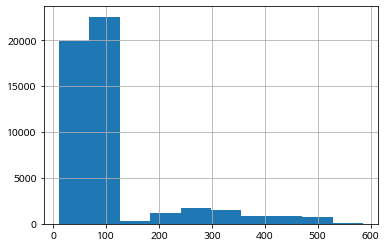

In [118]:
df_merged_all['quantity'].hist()

In [119]:
df_byCusType = df_merged_all[['Termination', 'customerType']].groupby('customerType').mean()
df_byCusType

,Termination
customerType,
BUSINESS,0.174253
PERSONAL,0.019019


In [120]:
df_byCusType = df_merged_all[['Termination', 'customerType']].groupby('customerType').mean()
df_byCusType

,Termination
customerType,
BUSINESS,0.174253
PERSONAL,0.019019


In [121]:
df_merged_all.to_csv('./merged.csv', encoding='euc-kr', index=False)

In [122]:
pd.crosstab(df_merged_all.Termination, df_merged.customerType, margins=True, normalize=True).round(3)

customerType,BUSINESS,PERSONAL,All
Termination,,,
0.0,0.141,0.817,0.958
1.0,0.007,0.035,0.042
All,0.147,0.853,1.000


In [123]:
pd.crosstab(df_merged_all.Termination, df_merged.customerType, margins=True, normalize=False).round(3)

customerType,BUSINESS,PERSONAL,All
Termination,,,
0.0,6978,40463,47441
1.0,324,1752,2076
All,7302,42215,49517


In [124]:
df_merged_all['channel'].unique()

array(['서비스 방문', '렌탈재계약', '렌탈총판', '하이마트', '홈쇼핑/방송', '홈쇼핑/인터넷', '이마트',
       '인터넷', '하하영업방판', '전자랜드', '홈플러스', '호호영업방판'], dtype=object)

In [125]:
df_merged_all.channel.value_counts()

렌탈재계약      7467
서비스 방문     7158
전자랜드       4988
하이마트       4966
홈쇼핑/방송     4082
인터넷        4069
홈쇼핑/인터넷    4064
이마트        3766
홈플러스       3748
렌탈총판       1851
호호영업방판     1820
하하영업방판     1775
Name: channel, dtype: int64

In [126]:
pd.crosstab(df_merged.channel, df_merged_all.Termination, margins=True, normalize=False).round(3)

Termination,0.0,1.0,All
channel,,,
렌탈재계약,7128,336,7464
렌탈총판,1787,64,1851
서비스 방문,6878,265,7143
이마트,3605,164,3769
인터넷,3884,174,4058
전자랜드,4793,207,5000
하이마트,4769,190,4959
하하영업방판,1691,81,1772
호호영업방판,1745,78,1823


In [127]:
pd.crosstab(df_merged.channel, df_merged_all.Termination, margins=True, normalize=True).round(3)

Termination,0.0,1.0,All
channel,,,
렌탈재계약,0.143,0.007,0.150
렌탈총판,0.036,0.001,0.037
서비스 방문,0.138,0.005,0.144
이마트,0.072,0.003,0.076
인터넷,0.078,0.003,0.082
전자랜드,0.096,0.004,0.100
하이마트,0.096,0.004,0.100
하하영업방판,0.034,0.002,0.036
호호영업방판,0.035,0.002,0.037


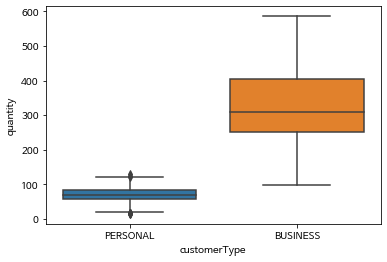

In [128]:
sns.boxplot(data = df_merged_all, x='customerType', y='quantity')

# 탐색적 분석

In [129]:
df_merged_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 28 columns):
seq                 49426 non-null float64
customerID          49754 non-null float64
gender              49754 non-null object
customerType        49516 non-null object
age                 49754 non-null object
marital             49754 non-null object
contractID          49754 non-null object
residence           49754 non-null object
channel             49754 non-null object
credit              49754 non-null object
payment             49754 non-null object
paymentCO           49754 non-null object
quantity            49754 non-null float64
maxDay              49754 non-null float64
overDue             49754 non-null float64
gift                49754 non-null float64
Termination         49754 non-null float64
province            49754 non-null object
city                49754 non-null object
provinceIS          49754 non-null object
cityIS              49754 non-null object
pa

In [130]:
df = df_merged_all

In [131]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.gender, margins=True),
                         pd.crosstab(df.Termination, df.gender).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.gender).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,FEMALE,MALE,UNKOWN
유지,47672.0,33221.000000,14424.000000,27.000000
해지,2082.0,1538.000000,544.000000,0.000000
전체,49754.0,34759.000000,14968.000000,27.000000
범주 내 유지율,NaN,0.955752,0.963656,1.000000
범주 내 해지율,NaN,0.044248,0.036344,0.000000
계약유지고객,NaN,0.696866,0.302568,0.000566
중도해지고객,NaN,0.738713,0.261287,0.000000


In [132]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.city, margins=True),
                         pd.crosstab(df.Termination, df.city).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.city).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,가평군,강남구,강동구,강북구,거제시,곡성군,광양시,구례군,기장군,마포구,사하구,안양시,양천구,연제구,익산시,진구,진천군,천안시,청주시,충주시,평택시,포천시,포항시 남구,포항시 북구,하동군,함안군,해남군,해운대구,홍성군,화성시
유지,47672.0,1410.000,3422.000,2346.000,1377.000,926.000,442.000,991.000,464.000,3351.000,969.000,2291.000,1464.000,3247.000,1030.000,462.000,981.000,504.000,993.000,3292.000,491.000,1449.000,2424.000,2301.000,1443.000,979.000,995.000,1008.000,3344.000,921.000,2355.000
해지,2082.0,65.000,123.000,135.000,68.000,37.000,20.000,36.000,21.000,137.000,33.000,114.000,67.000,153.000,29.000,20.000,41.000,27.000,40.000,130.000,24.000,46.000,117.000,116.000,73.000,51.000,32.000,35.000,133.000,41.000,118.000
전체,49754.0,1475.000,3545.000,2481.000,1445.000,963.000,462.000,1027.000,485.000,3488.000,1002.000,2405.000,1531.000,3400.000,1059.000,482.000,1022.000,531.000,1033.000,3422.000,515.000,1495.000,2541.000,2417.000,1516.000,1030.000,1027.000,1043.000,3477.000,962.000,2473.000
범주 내 유지율,NaN,0.956,0.965,0.946,0.953,0.962,0.957,0.965,0.957,0.961,0.967,0.953,0.956,0.955,0.973,0.959,0.960,0.949,0.961,0.962,0.953,0.969,0.954,0.952,0.952,0.950,0.969,0.966,0.962,0.957,0.952
범주 내 해지율,NaN,0.044,0.035,0.054,0.047,0.038,0.043,0.035,0.043,0.039,0.033,0.047,0.044,0.045,0.027,0.041,0.040,0.051,0.039,0.038,0.047,0.031,0.046,0.048,0.048,0.050,0.031,0.034,0.038,0.043,0.048
계약유지고객,NaN,0.030,0.072,0.049,0.029,0.019,0.009,0.021,0.010,0.070,0.020,0.048,0.031,0.068,0.022,0.010,0.021,0.011,0.021,0.069,0.010,0.030,0.051,0.048,0.030,0.021,0.021,0.021,0.070,0.019,0.049
중도해지고객,NaN,0.031,0.059,0.065,0.033,0.018,0.010,0.017,0.010,0.066,0.016,0.055,0.032,0.073,0.014,0.010,0.020,0.013,0.019,0.062,0.012,0.022,0.056,0.056,0.035,0.024,0.015,0.017,0.064,0.020,0.057


In [133]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.credit, margins=True),
                         pd.crosstab(df.Termination, df.credit).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.credit).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,HIGH,LOW,MIDDLE,UNKOWN
유지,47672.0,14356.000,4641.000,28651.000,24.000
해지,2082.0,628.000,218.000,1235.000,1.000
전체,49754.0,14984.000,4859.000,29886.000,25.000
범주 내 유지율,NaN,0.958,0.955,0.959,0.960
범주 내 해지율,NaN,0.042,0.045,0.041,0.040
계약유지고객,NaN,0.301,0.097,0.601,0.001
중도해지고객,NaN,0.302,0.105,0.593,0.000


In [134]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.marital, margins=True),
                         pd.crosstab(df.Termination, df.marital).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.marital).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,MARRIED,SINGLE
유지,47672.0,30108.000,17564.000
해지,2082.0,1354.000,728.000
전체,49754.0,31462.000,18292.000
범주 내 유지율,NaN,0.957,0.960
범주 내 해지율,NaN,0.043,0.040
계약유지고객,NaN,0.632,0.368
중도해지고객,NaN,0.650,0.350


In [135]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.age, margins=True),
                         pd.crosstab(df.Termination, df.age).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.age).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,20대,30대,40대,50대,60대 이상,All,미상
유지,8941.000,11443.000,13536.000,9108.000,4626.000,47672.0,18.0
해지,461.000,556.000,540.000,388.000,137.000,2082.0,0.0
전체,9402.000,11999.000,14076.000,9496.000,4763.000,49754.0,18.0
범주 내 유지율,0.951,0.954,0.962,0.959,0.971,NaN,1.0
범주 내 해지율,0.049,0.046,0.038,0.041,0.029,NaN,0.0
계약유지고객,0.188,0.240,0.284,0.191,0.097,NaN,0.0
중도해지고객,0.221,0.267,0.259,0.186,0.066,NaN,0.0


In [136]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.channel, margins=True),
                         pd.crosstab(df.Termination, df.channel).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.channel).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,렌탈재계약,렌탈총판,서비스 방문,이마트,인터넷,전자랜드,하이마트,하하영업방판,호호영업방판,홈쇼핑/방송,홈쇼핑/인터넷,홈플러스
유지,47672.0,7245.000,1590.000,6972.000,3639.000,3949.000,4849.000,4808.000,1510.000,1565.000,3972.000,3954.000,3619.000
해지,2082.0,222.000,261.000,186.000,127.000,120.000,139.000,158.000,265.000,255.000,110.000,110.000,129.000
전체,49754.0,7467.000,1851.000,7158.000,3766.000,4069.000,4988.000,4966.000,1775.000,1820.000,4082.000,4064.000,3748.000
범주 내 유지율,NaN,0.970,0.859,0.974,0.966,0.971,0.972,0.968,0.851,0.860,0.973,0.973,0.966
범주 내 해지율,NaN,0.030,0.141,0.026,0.034,0.029,0.028,0.032,0.149,0.140,0.027,0.027,0.034
계약유지고객,NaN,0.152,0.033,0.146,0.076,0.083,0.102,0.101,0.032,0.033,0.083,0.083,0.076
중도해지고객,NaN,0.107,0.125,0.089,0.061,0.058,0.067,0.076,0.127,0.122,0.053,0.053,0.062


In [137]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.gift, margins=True),
                         pd.crosstab(df.Termination, df.gift).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.gift).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

gift,0.0,1.0,All
유지,35416.000,12256.000,47672.0
해지,1523.000,559.000,2082.0
전체,36939.000,12815.000,49754.0
범주 내 유지율,0.959,0.956,NaN
범주 내 해지율,0.041,0.044,NaN
계약유지고객,0.743,0.257,NaN
중도해지고객,0.732,0.268,NaN


In [138]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.province, margins=True),
                         pd.crosstab(df.Termination, df.province).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.province).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,경기도,경상도,부산시,서울시,전라도,충청도
유지,47672.0,9102.000,6644.000,10997.000,11361.000,3367.000,6201.000
해지,2082.0,413.000,309.000,454.000,512.000,132.000,262.000
전체,49754.0,9515.000,6953.000,11451.000,11873.000,3499.000,6463.000
범주 내 유지율,NaN,0.957,0.956,0.960,0.957,0.962,0.959
범주 내 해지율,NaN,0.043,0.044,0.040,0.043,0.038,0.041
계약유지고객,NaN,0.191,0.139,0.231,0.238,0.071,0.130
중도해지고객,NaN,0.198,0.148,0.218,0.246,0.063,0.126


In [139]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.contractType, margins=True),
                         pd.crosstab(df.Termination, df.contractType).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.contractType).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,EIQ,EMQ,HIQ,HMQ,MIQ,MMQ
유지,47672.0,5761.000,6721.000,4189.000,4651.000,14005.000,12345.000
해지,2082.0,137.000,177.000,173.000,277.000,471.000,847.000
전체,49754.0,5898.000,6898.000,4362.000,4928.000,14476.000,13192.000
범주 내 유지율,NaN,0.977,0.974,0.960,0.944,0.967,0.936
범주 내 해지율,NaN,0.023,0.026,0.040,0.056,0.033,0.064
계약유지고객,NaN,0.121,0.141,0.088,0.098,0.294,0.259
중도해지고객,NaN,0.066,0.085,0.083,0.133,0.226,0.407


In [140]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.customerType, margins=True),
                         pd.crosstab(df.Termination, df.customerType).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.customerType).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,BUSINESS,PERSONAL
유지,47442.0,6023.000,41419.000
해지,2074.0,1271.000,803.000
전체,49516.0,7294.000,42222.000
범주 내 유지율,NaN,0.826,0.981
범주 내 해지율,NaN,0.174,0.019
계약유지고객,NaN,0.127,0.873
중도해지고객,NaN,0.613,0.387


In [141]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.residence, margins=True),
                         pd.crosstab(df.Termination, df.residence).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.residence).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,APART,All,ETC.,HOUSE,OFFICETEL
유지,20128.000,47672.0,2380.00,12921.000,12243.000
해지,930.000,2082.0,125.00,499.000,528.000
전체,21058.000,49754.0,2505.00,13420.000,12771.000
범주 내 유지율,0.956,NaN,0.95,0.963,0.959
범주 내 해지율,0.044,NaN,0.05,0.037,0.041
계약유지고객,0.422,NaN,0.05,0.271,0.257
중도해지고객,0.447,NaN,0.06,0.240,0.254


In [142]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.residence, margins=True),
                         pd.crosstab(df.Termination, df.residence).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.residence).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,APART,All,ETC.,HOUSE,OFFICETEL
유지,20128.000,47672.0,2380.00,12921.000,12243.000
해지,930.000,2082.0,125.00,499.000,528.000
전체,21058.000,49754.0,2505.00,13420.000,12771.000
범주 내 유지율,0.956,NaN,0.95,0.963,0.959
범주 내 해지율,0.044,NaN,0.05,0.037,0.041
계약유지고객,0.422,NaN,0.05,0.271,0.257
중도해지고객,0.447,NaN,0.06,0.240,0.254


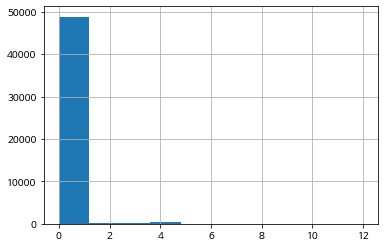

In [143]:
df['overDue'].hist()

In [144]:
df['overDue'].unique()

array([ 0.,  9.,  4.,  2.,  1.,  3., 10., 11., 12.,  8.])

In [145]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.overDue, margins=True),
                         pd.crosstab(df.Termination, df.overDue).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.overDue).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

overDue,0.0,1.0,2.0,3.0,4.0,8.0,9.0,10.0,11.0,12.0,All
유지,46548.000,259.000,286.000,268.000,287.000,2.000,5.0,7.0,5.000,5.0,47672.0
해지,2000.000,17.000,20.000,21.000,22.000,1.000,0.0,0.0,1.000,0.0,2082.0
전체,48548.000,276.000,306.000,289.000,309.000,3.000,5.0,7.0,6.000,5.0,49754.0
범주 내 유지율,0.959,0.938,0.935,0.927,0.929,0.667,1.0,1.0,0.833,1.0,NaN
범주 내 해지율,0.041,0.062,0.065,0.073,0.071,0.333,0.0,0.0,0.167,0.0,NaN
계약유지고객,0.976,0.005,0.006,0.006,0.006,0.000,0.0,0.0,0.000,0.0,NaN
중도해지고객,0.961,0.008,0.010,0.010,0.011,0.000,0.0,0.0,0.000,0.0,NaN


In [146]:
df_crosstab = pd.concat([pd.crosstab(df.Termination, df.channelType, margins=True),
                         pd.crosstab(df.Termination, df.channelType).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df.Termination, df.channelType).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['유지','해지','전체','범주 내 유지율', '범주 내 해지율', '계약유지고객','중도해지고객']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,대형마트,쇼핑몰,양판점,연장,총판
유지,47672.0,7258.000,11875.000,9657.000,14217.000,4665.000
해지,2082.0,256.000,340.000,297.000,408.000,781.000
전체,49754.0,7514.000,12215.000,9954.000,14625.000,5446.000
범주 내 유지율,NaN,0.966,0.972,0.970,0.972,0.857
범주 내 해지율,NaN,0.034,0.028,0.030,0.028,0.143
계약유지고객,NaN,0.152,0.249,0.203,0.298,0.098
중도해지고객,NaN,0.123,0.163,0.143,0.196,0.375


## Bar charts
### 범주별 중도해지율

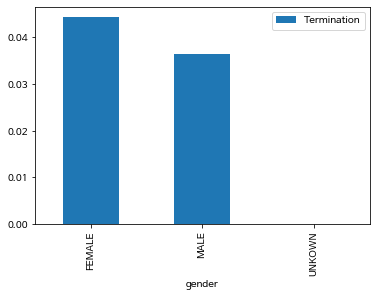

In [147]:
catvar = 'gender'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

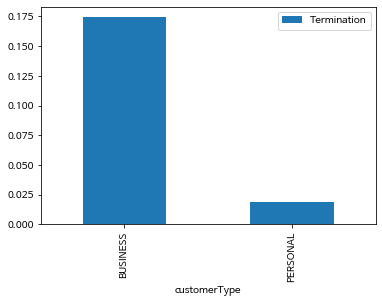

In [148]:
catvar = 'customerType'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

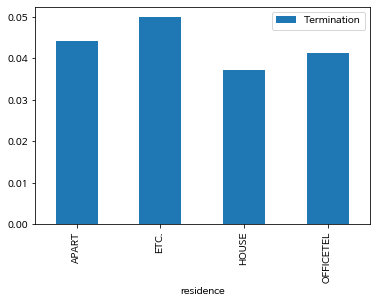

In [149]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'residence'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

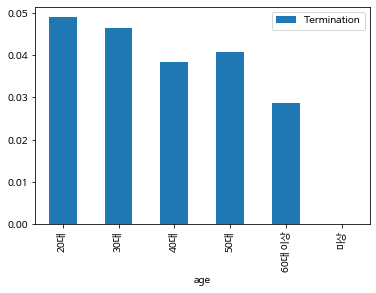

In [150]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'age'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

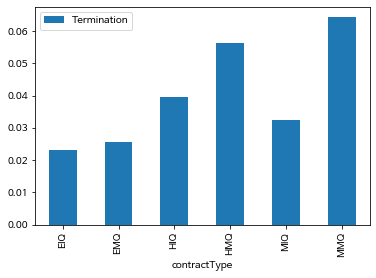

In [151]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'contractType'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

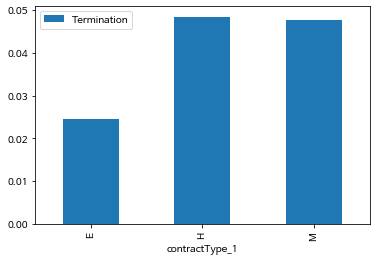

In [152]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'contractType_1'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

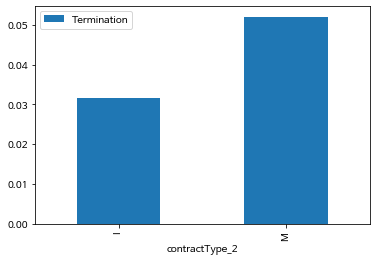

In [153]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'contractType_2'
N = len(df[catvar].unique())
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

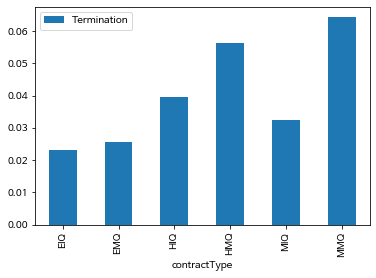

In [154]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'contractType'
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

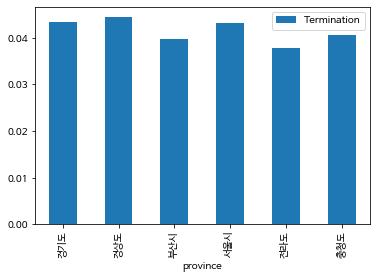

In [155]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'province'
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()
df_groupby.plot.bar()

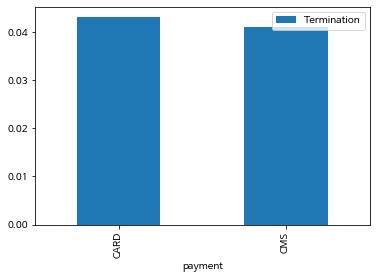

In [156]:
# 범주별 중도해지율: catvar에 '변수명'
catvar = 'payment'
df_groupby = df[['Termination', catvar]].groupby(catvar).mean()

df_groupby.plot.bar()

In [157]:
df_crosstab = pd.concat([pd.crosstab(df.age, df.contractType_1, margins=True),
pd.crosstab(df.age, df.contractType_1).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(df.age, df.contractType_1).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,E,H,M
age,,,,
20대,9402.0,4153.000,1150.000,4099.000
30대,11999.0,2655.000,4204.000,5140.000
40대,14076.0,2479.000,2056.000,9541.000
50대,9496.0,2462.000,1344.000,5690.000
60대 이상,4763.0,1047.000,533.000,3183.000
미상,18.0,0.000,3.000,15.000
All,49754.0,12796.000,9290.000,27668.000
20대,NaN,0.325,0.124,0.148
30대,NaN,0.207,0.453,0.186


## HeatMap

In [158]:
# 범주1 X 범주2 Heatmap
catvar1 = 'age'
catvar2 = 'gender'
df_groupby = df[['Termination', catvar1, catvar2]].groupby([catvar1, catvar2], axis=0).mean()

df_pivot = df_groupby.reset_index()
df_pivot = df_pivot[df_pivot['gender'] != 'UNKOWN']
df_pivot = df_pivot[df_pivot['age'] != '미상']
df_pivot

,age,gender,Termination
0,20대,FEMALE,0.058154
1,20대,MALE,0.027728
3,30대,FEMALE,0.046840
4,30대,MALE,0.045229
6,40대,FEMALE,0.038540
7,40대,MALE,0.038055
9,50대,FEMALE,0.044458
10,50대,MALE,0.032497
12,60대 이상,FEMALE,0.026767
13,60대 이상,MALE,0.033426


In [159]:
cleanup_nums = {"age":     {"20대": 0, "30대": 1, "40대":2, "50대":3, "60대 이상":4, '미상':None},
                 "gender": {"FEMALE": 0, "MALE": 1, 'UNKOWN':None}}
df_pivot.replace(cleanup_nums, inplace=True)
df_pivot

,age,gender,Termination
0,0,0,0.058154
1,0,1,0.027728
3,1,0,0.046840
4,1,1,0.045229
6,2,0,0.038540
7,2,1,0.038055
9,3,0,0.044458
10,3,1,0.032497
12,4,0,0.026767
13,4,1,0.033426


# 차원 축소 기법

import sklearn as sk
# import pandas as pd
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt


# import tensorflow as tf
# from tensorflow.examples.tutorials.mnist import input_data
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
# import keras
# from keras.models import Sequential, Model
# from keras.layers import Dense
# from keras.optimizers import Adam

In [160]:
# # 데이터 정의
# df_dummies = pd.get_dummies(df.select_dtypes('object'))
# df_dummies.info()

KeyboardInterrupt: 

# K-modes

In [ ]:
'''

### define the k-modes model
km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)
### fit the clusters to the skills dataframe
clusters = km.fit_predict(skills_df)
### get an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape
### For each cluster mode (a vector of "1" and "0")
### find and print the column headings where "1" appears.
### If no "1" appears, assign to "no-skills" cluster.
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in skills_df.columns[np.nonzero(cent)]:
            print(j)
'''

In [ ]:
# # df for k-modes
# df_kmodes = df.drop(['seq', 'customerID', 'contractID',
#                      'quantity',
#                      'Termination', 'payment',
#                      'province', 'provinceIS',
#                      'paymentCOTail', 'channelType',
#                      'contractType_1', 'contractType_2'], axis=1)
# df_kmodes.dropna(inplace = True)
# df_kmodes.info()

In [ ]:
# # dummy version
# df_kmodes_dummy = pd.get_dummies(df_kmodes.astype('object'))
# df_kmodes_dummy.head()

In [ ]:
# df_kmodes_dummy = df_kmodes_dummy.drop(['gender_UNKOWN', 'age_미상',
#                                        'credit_UNKOWN'], axis=1)

# define the k-modes model
### n_clusters
### init
### n_init
### verbose
km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# Fit: 오래 걸림
clusters = km.fit_predict(df_kmodes_dummy)

# an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape

# 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# 1이 없으면 군집에 'unknown' 배정
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("Unknown customers")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in df_kmodes_dummy.columns[np.nonzero(cent)]:
            print(j)

## overDue 제외

# df for k-modes
df_kmodes = df.drop(['seq', 'customerID', 'contractID',
                     'quantity', 'overDue',
                     'Termination', 'payment',
                     'province', 'provinceIS',
                     'paymentCOTail', 'channelType',
                     'contractType_1', 'contractType_2'], axis=1)
df_kmodes.dropna(inplace = True)

# dummy version
df_kmodes_dummy = pd.get_dummies(df_kmodes.astype('object'))
df_kmodes_dummy.head()

# 결측치 변수 제거
df_kmodes_dummy = df_kmodes_dummy.drop(['gender_UNKOWN', 'age_미상',
                                       'credit_UNKOWN'], axis=1)

# define the k-modes model
### n_clusters
### init
### n_init
### verbose
km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# Fit: 오래 걸림
clusters = km.fit_predict(df_kmodes_dummy)

# an array of cluster modes
kmodes = km.cluster_centroids_
shape = kmodes.shape

# 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# 1이 없으면 군집에 'unknown' 배정
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("Unknown customers")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in df_kmodes_dummy.columns[np.nonzero(cent)]:
            print(j)

In [ ]:
# # df for k-modes
# df_kmodes = df.drop(['customerID', 'contractID',
#                      'quantity', 'overDue',
#                      'payment',
#                      'province', 'provinceIS',
#                      'paymentCOTail', 'channelType',
#                      'contractType_1', 'contractType_2'], axis=1)
# df_kmodes.dropna(inplace = True)

# # dummy version
# df_kmodes_dummy = pd.get_dummies(df_kmodes.astype('object'))
# df_kmodes_dummy.head()

# # 결측치 변수 제거
# df_kmodes_dummy = df_kmodes_dummy.drop(['gender_UNKOWN', 'age_미상',
#                                        'credit_UNKOWN'], axis=1)

# # define the k-modes model
# ### n_clusters
# ### init
# ### n_init
# ### verbose
# km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# # Fit: 오래 걸림
# clusters = km.fit_predict(df_kmodes_dummy)

# # an array of cluster modes
# kmodes = km.cluster_centroids_
# shape = kmodes.shape

# # 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# # 1이 없으면 군집에 'unknown' 배정
# for i in range(shape[0]):
#     if sum(kmodes[i,:]) == 0:
#         print("\ncluster " + str(i) + ": ")
#         print("Unknown customers")
#     else:
#         print("\ncluster " + str(i) + ": ")
#         cent = kmodes[i,:]
#         for j in df_kmodes_dummy.columns[np.nonzero(cent)]:
#             print(j)

In [ ]:
# # df for k-modes
# df_kmodes = df.drop(['customerID', 'contractID',
#                      'quantity', 'overDue',
#                      'payment',
#                      'province', 'provinceIS',
#                      'paymentCOTail', 'channelType',
#                      'contractType_1', 'contractType_2'], axis=1)
# df_kmodes.dropna(inplace = True)

# df_kmodes = df_kmodes.query('Termination == 1')
# # dummy version
# df_kmodes_dummy = pd.get_dummies(df_kmodes.astype('object'))
# df_kmodes_dummy.head()

# # 결측치 변수 제거
# df_kmodes_dummy = df_kmodes_dummy.drop(['credit_UNKOWN'], axis=1)

# # define the k-modes model
# ### n_clusters
# ### init
# ### n_init
# ### verbose
# km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# # Fit: 오래 걸림
# clusters = km.fit_predict(df_kmodes_dummy)

# # an array of cluster modes
# kmodes = km.cluster_centroids_
# shape = kmodes.shape

# # 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# # 1이 없으면 군집에 'unknown' 배정
# for i in range(shape[0]):
#     if sum(kmodes[i,:]) == 0:
#         print("\ncluster " + str(i) + ": ")
#         print("Unknown customers")
#     else:
#         print("\ncluster " + str(i) + ": ")
#         cent = kmodes[i,:]
#         for j in df_kmodes_dummy.columns[np.nonzero(cent)]:
#             print(j)

In [ ]:
# # df for k-modes
# df_kmodes = df.drop(['customerID', 'contractID',
#                      'quantity', 'overDue',
#                      'payment',
#                      'province', 'provinceIS',
#                      'paymentCOTail', 'channelType',
#                      'contractType_1', 'contractType_2'], axis=1)
# df_kmodes.dropna(inplace = True)

# df_kmodes = df_kmodes.query('Termination == 0')

# # dummy version
# df_kmodes_dummy = pd.get_dummies(df_kmodes.astype('object'))
# df_kmodes_dummy.head()

# # 결측치 변수 제거
# df_kmodes_dummy = df_kmodes_dummy.drop(['gender_UNKOWN', 'age_미상',
#                                        'credit_UNKOWN'], axis=1)

# # define the k-modes model
# ### n_clusters
# ### init
# ### n_init
# ### verbose
# km = KModes(n_clusters=10, init='Huang', n_init=11, verbose=1)

# # Fit: 오래 걸림
# clusters = km.fit_predict(df_kmodes_dummy)

# # an array of cluster modes
# kmodes = km.cluster_centroids_
# shape = kmodes.shape

# # 군집 mode(1, 0 vector) 각각에 값이 1인 column 찾아서 표시
# # 1이 없으면 군집에 'unknown' 배정
# for i in range(shape[0]):
#     if sum(kmodes[i,:]) == 0:
#         print("\ncluster " + str(i) + ": ")
#         print("Unknown customers")
#     else:
#         print("\ncluster " + str(i) + ": ")
#         cent = kmodes[i,:]
#         for j in df_kmodes_dummy.columns[np.nonzero(cent)]:
#             print(j)

# 고객유형 결측치 처리

In [161]:
# 개인
df.query('customerType == "PERSONAL"').describe().round(3)

,seq,customerID,quantity,maxDay,overDue,gift,Termination
count,41939.000,42222.000,42222.000,42222.000,42222.000,42222.000,42222.000
mean,24997.100,828618.578,69.969,3.715,0.058,0.260,0.019
std,14448.506,99498.670,17.358,2.001,0.458,0.439,0.137
min,1.000,656376.000,14.100,0.000,0.000,0.000,0.000
25%,12489.500,742353.250,57.000,2.000,0.000,0.000,0.000
50%,24975.000,828829.000,69.900,5.000,0.000,0.000,0.000
75%,37535.500,915331.500,82.900,5.000,0.000,1.000,0.000
max,50000.000,999998.000,130.800,9.000,12.000,1.000,1.000


In [162]:
# 법인
df.query('customerType == "BUSINESS"').describe().round(3)

,seq,customerID,quantity,maxDay,overDue,gift,Termination
count,7252.000,7294.000,7294.000,7294.000,7294.000,7294.000,7294.000
mean,25009.738,828618.165,327.024,2.185,0.112,0.242,0.174
std,14372.034,98548.313,99.905,1.846,0.606,0.428,0.379
min,9.000,656500.000,98.700,0.000,0.000,0.000,0.000
25%,12509.750,744170.750,249.700,1.000,0.000,0.000,0.000
50%,25124.500,828333.500,309.350,2.000,0.000,0.000,0.000
75%,37328.000,914220.000,403.100,4.000,0.000,0.000,0.000
max,49991.000,999973.000,585.900,9.000,12.000,1.000,1.000


In [163]:
# 범주1 X 범주2 빈도 구하고 row 비율, columns 비율 구하기 (가로, 세로 각각 더해서 1)
df_crosstab = pd.concat([pd.crosstab(df.customerType, df.residence, margins=True),
pd.crosstab(df.customerType, df.residence).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(df.customerType, df.residence).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,APART,All,ETC.,HOUSE,OFFICETEL
customerType,,,,,
BUSINESS,3851.000,7294.0,361.000,1554.000,1528.000
PERSONAL,17101.000,42222.0,2134.000,11811.000,11176.000
All,20952.000,49516.0,2495.000,13365.000,12704.000
BUSINESS,0.184,NaN,0.145,0.116,0.120
PERSONAL,0.816,NaN,0.855,0.884,0.880
BUSINESS,0.528,NaN,0.049,0.213,0.209
PERSONAL,0.405,NaN,0.051,0.280,0.265


In [164]:
# 범주1 X 범주2 빈도 구하고 row 비율, columns 비율 구하기 (가로, 세로 각각 더해서 1)
df_crosstab = pd.concat([pd.crosstab(df.customerType, df.contractType, margins=True),
pd.crosstab(df.customerType, df.contractType).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(df.customerType, df.contractType).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,All,EIQ,EMQ,HIQ,HMQ,MIQ,MMQ
customerType,,,,,,,
BUSINESS,7294.0,278.000,254.000,46.000,116.000,3261.000,3339.000
PERSONAL,42222.0,5589.000,6615.000,4289.000,4787.000,11142.000,9800.000
All,49516.0,5867.000,6869.000,4335.000,4903.000,14403.000,13139.000
BUSINESS,NaN,0.047,0.037,0.011,0.024,0.226,0.254
PERSONAL,NaN,0.953,0.963,0.989,0.976,0.774,0.746
BUSINESS,NaN,0.038,0.035,0.006,0.016,0.447,0.458
PERSONAL,NaN,0.132,0.157,0.102,0.113,0.264,0.232


In [165]:
# 범주1 X 범주2 빈도 구하고 row 비율, columns 비율 구하기 (가로, 세로 각각 더해서 1)
df_crosstab = pd.concat([pd.crosstab(df.customerType, df.maxDay, margins=True),
pd.crosstab(df.customerType, df.maxDay).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(df.customerType, df.maxDay).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

maxDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,All
customerType,,,,,,,,,
BUSINESS,1605.000,1620.000,1274.000,925.000,857.000,527.000,480.000,6.000,7294.0
PERSONAL,4133.000,4218.000,4200.000,4279.000,4261.000,12452.000,8672.000,7.000,42222.0
All,5738.000,5838.000,5474.000,5204.000,5118.000,12979.000,9152.000,13.000,49516.0
BUSINESS,0.280,0.277,0.233,0.178,0.167,0.041,0.052,0.462,NaN
PERSONAL,0.720,0.723,0.767,0.822,0.833,0.959,0.948,0.538,NaN
BUSINESS,0.220,0.222,0.175,0.127,0.117,0.072,0.066,0.001,NaN
PERSONAL,0.098,0.100,0.099,0.101,0.101,0.295,0.205,0.000,NaN


In [166]:
# 범주1 X 범주2 빈도 구하고 row 비율, columns 비율 구하기 (가로, 세로 각각 더해서 1)
df_crosstab = pd.concat([pd.crosstab(df.customerType, df.channelType, margins=True),
pd.crosstab(df.customerType, df.channelType).apply(lambda r: r/r.sum(), axis=0),
pd.crosstab(df.customerType, df.channelType).apply(lambda r: r/r.sum(), axis=1)])

df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


,All,대형마트,쇼핑몰,양판점,연장,총판
customerType,,,,,,
BUSINESS,7294.0,1094.000,1822.000,1482.000,2164.000,732.000
PERSONAL,42222.0,6381.000,10350.000,8420.000,12386.000,4685.000
All,49516.0,7475.000,12172.000,9902.000,14550.000,5417.000
BUSINESS,NaN,0.146,0.150,0.150,0.149,0.135
PERSONAL,NaN,0.854,0.850,0.850,0.851,0.865
BUSINESS,NaN,0.150,0.250,0.203,0.297,0.100
PERSONAL,NaN,0.151,0.245,0.199,0.293,0.111


## 의사결정나무

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49754 entries, 0 to 49753
Data columns (total 28 columns):
seq                 49426 non-null float64
customerID          49754 non-null float64
gender              49754 non-null object
customerType        49516 non-null object
age                 49754 non-null object
marital             49754 non-null object
contractID          49754 non-null object
residence           49754 non-null object
channel             49754 non-null object
credit              49754 non-null object
payment             49754 non-null object
paymentCO           49754 non-null object
quantity            49754 non-null float64
maxDay              49754 non-null float64
overDue             49754 non-null float64
gift                49754 non-null float64
Termination         49754 non-null float64
province            49754 non-null object
city                49754 non-null object
provinceIS          49754 non-null object
cityIS              49754 non-null object
pa

In [168]:
# 고객유형 예측: 
df_tree = df[['quantity', 'maxDay', 'Termination', 'contractExtended', 'contractType']]
df_tree['Termination'] = df_tree[['Termination']].astype('object')

# X, Y 분리 & Dummy 변수
df_tree_y = pd.get_dummies(df[['customerType']], drop_first=True)
df_tree_x = pd.get_dummies(df_tree)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [169]:
df_tree_x.head()

,quantity,maxDay,Termination_0.0,Termination_1.0,contractExtended_신규,contractExtended_연장,contractType_EIQ,contractType_EMQ,contractType_HIQ,contractType_HMQ,contractType_MIQ,contractType_MMQ
0,79.5,3.0,1,0,0,1,0,0,0,0,0,1
1,76.5,5.0,1,0,0,1,1,0,0,0,0,0
2,55.1,1.0,1,0,1,0,0,0,1,0,0,0
3,50.4,5.0,1,0,1,0,0,0,0,0,1,0
4,75.3,3.0,1,0,1,0,0,0,0,0,0,1


In [170]:
df_test = df[df['customerType'].isna()]
df_test_x = df_test[['quantity', 'maxDay', 'Termination', 'contractExtended', 'contractType']]
df_test_x['Termination'] = df_test_x[['Termination']].astype('object')
df_test_x = pd.get_dummies(df_test_x)
df_test_x.head()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,quantity,maxDay,Termination_0.0,Termination_1.0,contractExtended_신규,contractExtended_연장,contractType_EIQ,contractType_EMQ,contractType_HIQ,contractType_HMQ,contractType_MIQ,contractType_MMQ
69,89.9,5.0,1,0,0,1,0,0,0,0,0,1
162,93.9,0.0,1,0,0,1,0,0,0,1,0,0
235,402.6,1.0,1,0,1,0,0,0,0,0,1,0
282,239.2,6.0,1,0,1,0,0,0,0,0,0,1
398,56.6,3.0,1,0,0,1,0,0,0,1,0,0


In [171]:
idx_test = df_test_x.index
idx_test.astype('int32', copy=False)

Int64Index([   69,   162,   235,   282,   398,   418,   950,  1615,  2267,
             2358,
            ...
            47978, 48364, 48428, 48452, 48768, 48855, 49097, 49323, 49353,
            49712],
           dtype='int64', length=238)

In [172]:
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_tree_x, df_tree_y, test_size = 0.7)

# print('train data X size:{}'.format(df_train_x.shape))
# print('train data Y size:{}'.format(df_train_y.shape))
# print('test data X size:{}'.format(df_test_x.shape))
# print('test data Y size:{}'.format(df_test_y.shape))

tree_final = DTC(max_depth=7,
                min_samples_leaf=3)
tree_final.fit(df_tree_x, df_tree_y)
df_test_y = pd.DataFrame(tree_final.predict(df_test_x), columns=['customerTypePred'])


print('Accuracy on Training: {0:.3f}\n'.format(tree_final.score(df_tree_x, df_tree_y)))
# print('Accuracy on Test: {0:.3f}\n'.format(tree_final.score(df_test_x, df_test_y)))

# # 나무
# v_feature_name = df_train_x.columns
# export_graphviz(tree_final, out_file='tree_final.dot', class_names=['법인', '개인'],
#                feature_names = v_feature_name, impurity = True, filled=True)

# with open('tree_final.dot') as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph).view()

Accuracy on Training: 0.996



In [173]:
df_test_x.index

Int64Index([   69,   162,   235,   282,   398,   418,   950,  1615,  2267,
             2358,
            ...
            47978, 48364, 48428, 48452, 48768, 48855, 49097, 49323, 49353,
            49712],
           dtype='int64', length=238)

In [174]:
df_test_y.index = idx_test

In [175]:
df_predicted = pd.concat([df_test_x, df_test_y], axis=1, join='inner')
df_predicted

,quantity,maxDay,Termination_0.0,Termination_1.0,contractExtended_신규,contractExtended_연장,contractType_EIQ,contractType_EMQ,contractType_HIQ,contractType_HMQ,contractType_MIQ,contractType_MMQ,customerTypePred
69,89.9,5.0,1,0,0,1,0,0,0,0,0,1,1
162,93.9,0.0,1,0,0,1,0,0,0,1,0,0,1
235,402.6,1.0,1,0,1,0,0,0,0,0,1,0,0
282,239.2,6.0,1,0,1,0,0,0,0,0,0,1,0
398,56.6,3.0,1,0,0,1,0,0,0,1,0,0,1
418,40.9,6.0,1,0,1,0,0,0,0,0,1,0,1
950,48.3,5.0,1,0,1,0,0,0,0,0,1,0,1
1615,48.5,6.0,1,0,1,0,0,0,0,0,0,1,1
2267,65.5,5.0,1,0,1,0,0,0,0,0,0,1,1
2358,89.8,1.0,1,0,1,0,0,0,0,0,0,1,1


In [176]:
df_predicted.describe()

,quantity,maxDay,Termination_0.0,Termination_1.0,contractExtended_신규,contractExtended_연장,contractType_EIQ,contractType_EMQ,contractType_HIQ,contractType_HMQ,contractType_MIQ,contractType_MMQ,customerTypePred
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,103.443277,3.495798,0.966387,0.033613,0.684874,0.315126,0.130252,0.121849,0.113445,0.105042,0.306723,0.222689,0.873950
std,91.200958,1.991009,0.180612,0.180612,0.465545,0.465545,0.337290,0.327800,0.317805,0.307254,0.462105,0.416928,0.332606
min,10.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.900000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,75.350000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,89.800000,5.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,496.100000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [177]:
df_tree_y.describe()

,customerType_PERSONAL
count,49754.000000
mean,0.848615
std,0.358427
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [178]:
# 고객유형 결측치 278개 중 208개 -> 개인, 69개 -> 법인
df_predicted['customerTypePred'].sum()

208

In [179]:
df['customerType'].fillna(df_predicted['customerTypePred'], inplace = True)

In [180]:
df.isna().sum()

seq                 328
customerID          0  
gender              0  
customerType        0  
age                 0  
marital             0  
contractID          0  
residence           0  
channel             0  
credit              0  
payment             0  
paymentCO           0  
quantity            0  
maxDay              0  
overDue             0  
gift                0  
Termination         0  
province            0  
city                0  
provinceIS          0  
cityIS              0  
paymentCOTail       0  
cityGrade           0  
channelType         0  
contractExtended    0  
contractType        0  
contractType_1      0  
contractType_2      0  
dtype: int64

In [181]:
df =df.drop('seq', axis=1)

In [182]:
df.isna().sum()

customerID          0
gender              0
customerType        0
age                 0
marital             0
contractID          0
residence           0
channel             0
credit              0
payment             0
paymentCO           0
quantity            0
maxDay              0
overDue             0
gift                0
Termination         0
province            0
city                0
provinceIS          0
cityIS              0
paymentCOTail       0
cityGrade           0
channelType         0
contractExtended    0
contractType        0
contractType_1      0
contractType_2      0
dtype: int64

In [183]:
df.to_csv('./merged_total.csv', encoding='euc-kr', index=False)

# 추가 탐색

In [184]:
df_biz = df.query('customerType == "BUSINESS"')
df_biz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7294 entries, 8 to 49744
Data columns (total 27 columns):
customerID          7294 non-null float64
gender              7294 non-null object
customerType        7294 non-null object
age                 7294 non-null object
marital             7294 non-null object
contractID          7294 non-null object
residence           7294 non-null object
channel             7294 non-null object
credit              7294 non-null object
payment             7294 non-null object
paymentCO           7294 non-null object
quantity            7294 non-null float64
maxDay              7294 non-null float64
overDue             7294 non-null float64
gift                7294 non-null float64
Termination         7294 non-null float64
province            7294 non-null object
city                7294 non-null object
provinceIS          7294 non-null object
cityIS              7294 non-null object
paymentCOTail       7294 non-null object
cityGrade           7294 

In [187]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.age, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.age).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.age).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,20대,30대,40대,50대,60대 이상,All,미상
12개월,647.000,921.000,983.000,711.000,322.000,3585.0,1.0
36개월,688.000,926.000,1013.000,705.000,376.000,3709.0,1.0
전체,1335.000,1847.000,1996.000,1416.000,698.000,7294.0,2.0
범주 내 12개월,0.485,0.499,0.492,0.502,0.461,NaN,0.5
범주 내 36개월,0.515,0.501,0.508,0.498,0.539,NaN,0.5
12개월,0.180,0.257,0.274,0.198,0.090,NaN,0.0
36개월,0.185,0.250,0.273,0.190,0.101,NaN,0.0


In [188]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.marital, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.marital).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.marital).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,MARRIED,SINGLE
12개월,3585.0,2261.000,1324.000
36개월,3709.0,2374.000,1335.000
전체,7294.0,4635.000,2659.000
범주 내 12개월,NaN,0.488,0.498
범주 내 36개월,NaN,0.512,0.502
12개월,NaN,0.631,0.369
36개월,NaN,0.640,0.360


In [189]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.residence, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.residence).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.residence).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,APART,All,ETC.,HOUSE,OFFICETEL
12개월,1873.000,3585.0,171.000,778.000,763.000
36개월,1978.000,3709.0,190.000,776.000,765.000
전체,3851.000,7294.0,361.000,1554.000,1528.000
범주 내 12개월,0.486,NaN,0.474,0.501,0.499
범주 내 36개월,0.514,NaN,0.526,0.499,0.501
12개월,0.522,NaN,0.048,0.217,0.213
36개월,0.533,NaN,0.051,0.209,0.206


In [190]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.channelType, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.channelType).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.channelType).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,대형마트,쇼핑몰,양판점,연장,총판
12개월,3585.0,543.000,912.000,725.000,1062.000,343.000
36개월,3709.0,551.000,910.000,757.000,1102.000,389.000
전체,7294.0,1094.000,1822.000,1482.000,2164.000,732.000
범주 내 12개월,NaN,0.496,0.501,0.489,0.491,0.469
범주 내 36개월,NaN,0.504,0.499,0.511,0.509,0.531
12개월,NaN,0.151,0.254,0.202,0.296,0.096
36개월,NaN,0.149,0.245,0.204,0.297,0.105


In [191]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.maxDay, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.maxDay).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.maxDay).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

maxDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,All
12개월,1042.000,1025.000,717.000,381.000,351.000,44.000,22.000,3.000,3585.0
36개월,563.000,595.000,557.000,544.000,506.000,483.000,458.000,3.000,3709.0
전체,1605.000,1620.000,1274.000,925.000,857.000,527.000,480.000,6.000,7294.0
범주 내 12개월,0.649,0.633,0.563,0.412,0.410,0.083,0.046,0.500,NaN
범주 내 36개월,0.351,0.367,0.437,0.588,0.590,0.917,0.954,0.500,NaN
12개월,0.291,0.286,0.200,0.106,0.098,0.012,0.006,0.001,NaN
36개월,0.152,0.160,0.150,0.147,0.136,0.130,0.123,0.001,NaN


In [192]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.cityGrade, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.cityGrade).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.cityGrade).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,1급지,2급지,3급지,4급지,5급지,6급지,All
12개월,1230.000,852.000,570.000,358.000,367.000,208.000,3585.0
36개월,1288.000,891.000,575.000,390.000,391.000,174.000,3709.0
전체,2518.000,1743.000,1145.000,748.000,758.000,382.000,7294.0
범주 내 12개월,0.488,0.489,0.498,0.479,0.484,0.545,NaN
범주 내 36개월,0.512,0.511,0.502,0.521,0.516,0.455,NaN
12개월,0.343,0.238,0.159,0.100,0.102,0.058,NaN
36개월,0.347,0.240,0.155,0.105,0.105,0.047,NaN


In [193]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.credit, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.credit).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.credit).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,HIGH,LOW,MIDDLE,UNKOWN
12개월,3585.0,1039.000,375.000,2170.000,1.0
36개월,3709.0,1161.000,384.000,2163.000,1.0
전체,7294.0,2200.000,759.000,4333.000,2.0
범주 내 12개월,NaN,0.472,0.494,0.501,0.5
범주 내 36개월,NaN,0.528,0.506,0.499,0.5
12개월,NaN,0.290,0.105,0.605,0.0
36개월,NaN,0.313,0.104,0.583,0.0


In [ ]:
df_crosstab = pd.concat([pd.crosstab(df_biz.contractType_2, df_biz.maxDay, margins=True),
                         pd.crosstab(df_biz.contractType_2, df_biz.maxDay).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.contractType_2, df_biz.maxDay).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

## 요주의 고객: 물 사용량 110~250, 렌탈 12개월, maxDay 주말

In [244]:
df_focus = df_biz.query('quantity < 300')
df_focus.describe().round(3)

,customerID,quantity,maxDay,overDue,gift,Termination
count,3328.000,3328.000,3328.000,3328.000,3328.000,3328.000
mean,831349.787,239.341,2.816,0.115,0.207,0.251
std,98249.596,40.350,1.981,0.653,0.405,0.434
min,656500.000,98.700,0.000,0.000,0.000,0.000
25%,748443.000,208.300,1.000,0.000,0.000,0.000
50%,832531.000,244.550,3.000,0.000,0.000,0.000
75%,915671.000,274.400,5.000,0.000,0.000,1.000
max,999973.000,299.900,9.000,12.000,1.000,1.000


In [245]:
df_middle = df_biz.query('quantity >= 300 and quantity < 500')
df_middle.describe().round(3)

,customerID,quantity,maxDay,overDue,gift,Termination
count,3525.000,3525.000,3525.000,3525.000,3525.000,3525.000
mean,826946.533,385.436,1.687,0.108,0.272,0.108
std,98545.316,60.459,1.559,0.562,0.445,0.311
min,656524.000,300.000,0.000,0.000,0.000,0.000
25%,742736.000,329.200,0.000,0.000,0.000,0.000
50%,825707.000,379.500,1.000,0.000,0.000,0.000
75%,912933.000,437.400,3.000,0.000,1.000,0.000
max,999829.000,499.900,9.000,4.000,1.000,1.000


In [246]:
df_tail = df_biz.query('quantity >= 500')
df_tail.describe().round(3)

,customerID,quantity,maxDay,overDue,gift,Termination
count,441.000,441.000,441.000,441.000,441.000,441.000
mean,821365.707,521.822,1.413,0.111,0.270,0.122
std,100367.388,18.181,1.329,0.575,0.444,0.328
min,657077.000,500.000,0.000,0.000,0.000,0.000
25%,729570.000,507.400,0.000,0.000,0.000,0.000
50%,826093.000,517.500,1.000,0.000,0.000,0.000
75%,904350.000,530.400,2.000,0.000,1.000,0.000
max,999385.000,585.900,4.000,4.000,1.000,1.000


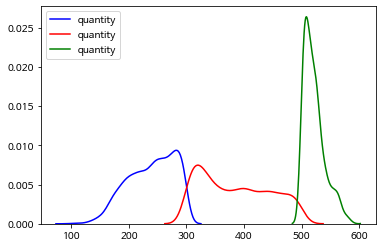

In [247]:
sns.kdeplot(df_focus['quantity'], color='blue')
sns.kdeplot(df_middle['quantity'], color='red')
sns.kdeplot(df_tail['quantity'], color='green')

<function seaborn.relational.lineplot(x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, sort=True, err_style='band', err_kws=None, legend='brief', ax=None, **kwargs)>

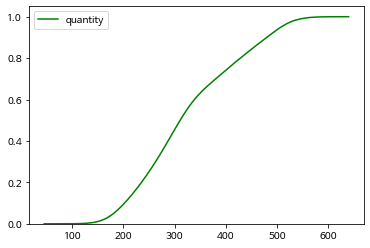

In [264]:
sns.kdeplot(df_biz['quantity'], color='green', cumulative = True)
sns.lineplot()

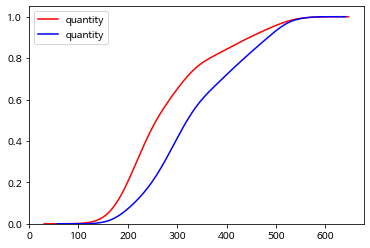

In [251]:
sns.kdeplot(df_biz.query('Termination==1')['quantity'], color='red', cumulative = True)
sns.kdeplot(df_biz.query('Termination==0')['quantity'], color='blue', cumulative = True)

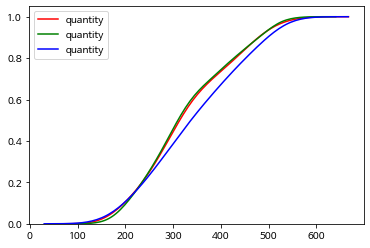

In [255]:
sns.kdeplot(df_biz.query('contractType_1=="E"')['quantity'], color='red', cumulative = True)
sns.kdeplot(df_biz.query('contractType_1=="M"')['quantity'], color='green', cumulative = True)
sns.kdeplot(df_biz.query('contractType_1=="H"')['quantity'], color='blue', cumulative = True)

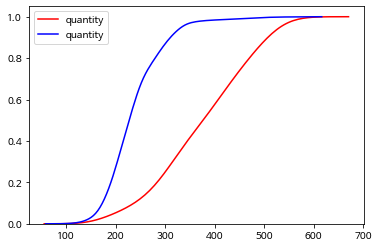

In [261]:
sns.kdeplot(df_biz.query('contractType_2=="I" and Termination == 1')['quantity'], color='red', cumulative = True)
sns.kdeplot(df_biz.query('contractType_2=="M" and Termination == 1')['quantity'], color='blue', cumulative = True)


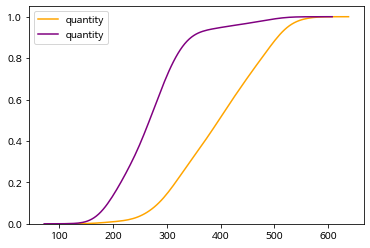

In [262]:
sns.kdeplot(df_biz.query('contractType_2=="I" and Termination == 0')['quantity'], color='Orange', cumulative = True)
sns.kdeplot(df_biz.query('contractType_2=="M" and Termination == 0')['quantity'], color='Purple', cumulative = True)

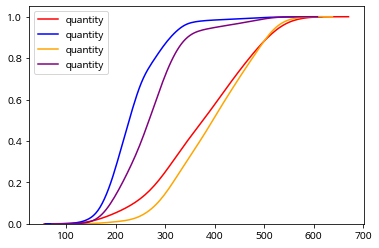

In [263]:
sns.kdeplot(df_biz.query('contractType_2=="I" and Termination == 1')['quantity'], color='red', cumulative = True)
sns.kdeplot(df_biz.query('contractType_2=="M" and Termination == 1')['quantity'], color='blue', cumulative = True)
sns.kdeplot(df_biz.query('contractType_2=="I" and Termination == 0')['quantity'], color='Orange', cumulative = True)
sns.kdeplot(df_biz.query('contractType_2=="M" and Termination == 0')['quantity'], color='Purple', cumulative = True)

# 법인 고객 지역별 중도해지율

In [265]:
df_crosstab = pd.concat([pd.crosstab(df_biz.Termination, df_biz.province, margins=True),
                         pd.crosstab(df_biz.Termination, df_biz.province).apply(lambda r: r/r.sum(), axis=0),                   
                         pd.crosstab(df_biz.Termination, df_biz.province).apply(lambda r: r/r.sum(), axis=1)])
df_crosstab.index = ['12개월','36개월','전체','범주 내 12개월', '범주 내 36개월', '12개월','36개월']
df_crosstab.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,All,경기도,경상도,부산시,서울시,전라도,충청도
12개월,6023.0,1161.000,849.000,1324.000,1478.000,410.000,801.000
36개월,1271.0,209.000,183.000,285.000,315.000,91.000,188.000
전체,7294.0,1370.000,1032.000,1609.000,1793.000,501.000,989.000
범주 내 12개월,NaN,0.847,0.823,0.823,0.824,0.818,0.810
범주 내 36개월,NaN,0.153,0.177,0.177,0.176,0.182,0.190
12개월,NaN,0.193,0.141,0.220,0.245,0.068,0.133
36개월,NaN,0.164,0.144,0.224,0.248,0.072,0.148
